# Generate Data for Chartbook

Brian Dew

@bd_econ

In [1]:
import sys
sys.path.append('../src')

import requests

import uschartbook.config

from uschartbook.config import *
from uschartbook.utils import *

### Unemployment rate

In [121]:
# Series stored as a dictionary
series = {'LNS14000003': 'White', 
          'LNS14000006': 'Black', 
          'LNS14000009': 'Hispanic',
          'LNS14000000': 'Total',
          'LNS13000000': 'Level'}

# Start year and end year
dates = (1989, 2019)
df = bls_api(series, dates, bls_key)
srs = ['White', 'Black', 'Hispanic']
df[srs].to_csv(data_dir / 'unemp.csv', index_label='date')

Post Request Status: REQUEST_SUCCEEDED


In [122]:
s = series_info(df['Level'])
s2 = series_info(df['Total'])
s3 = series_info(df['Black'])

In [123]:
text = ('Unemployment is currently very low. BLS '+
        '\href{https://www.bls.gov/news.release/empsit.nr0.htm}{reports} '+
        f' {s["val_latest"]/1000:.1f} million '+
        f'unemployed persons in {s["date_latest_ft"]}, '+
        f'and an unemployment rate of {s2["val_latest"]} percent. '+
        'Over the past year, the black or African American unemployment rate '+
        f'has fallen by {abs(s3["change_year_ago"]):.1f} percentage '+
        f'points to {s3["val_latest"]:.1f} percent.')

In [124]:
write_txt(text_dir / 'unemp.txt', text)

In [125]:
text

'Unemployment is currently very low. BLS \\href{https://www.bls.gov/news.release/empsit.nr0.htm}{reports}  5.9 million unemployed persons in October 2019, and an unemployment rate of 3.6 percent. Over the past year, the black or African American unemployment rate has fallen by 0.8 percentage points to 5.4 percent.'

### Unemployment by reason

In [185]:
# Series stored as a dictionary
series = {'LNS14023621': 'Job Loser', 
          'LNS14023705': 'Job Leaver', 
          'LNS14023557': 'Re-entrant',
          'LNS14023569': 'New entrant'}

# Start year and end year
dates = (1989, 2019)
df = bls_api(series, dates, bls_key)

df.resample('QS').mean().to_csv(data_dir / 'unemp_reason.csv', index_label='date')

Post Request Status: REQUEST_SUCCEEDED


In [192]:
loser = df['Job Loser'].iloc[-1]
leaver = df['Job Leaver'].iloc[-1]
reent = df['Re-entrant'].iloc[-1]
newent = df['New entrant'].iloc[-1]
ltdate = df.index[-1].strftime('%B %Y')

In [195]:
text = (f'In {ltdate}, {loser:.1f} percent of the labor force '+
        'were unemployed because of losing a job or having a '+
        f'job end, {leaver:.1f} percent were re-entrants, '+
        f'{reent:.1f} percent new entrants, and {newent:.1f} '+
        'percent job leavers. ')

In [196]:
write_txt(text_dir / 'unemp_reason.txt', text)

### Openings, Quits, Hires

In [86]:
# Series stored as a dictionary
series = {'JTS00000000JOL': 'Openings', 
          'JTS00000000HIL': 'Hires', 
          'JTS00000000QUL': 'Quits',
          'JTS00000000TSL': 'Separations',
          'LNS13000000': 'Unemp'}

# Start year and end year
dates = (2000, 2019)
df = bls_api(series, dates, bls_key)

Post Request Status: REQUEST_SUCCEEDED


In [103]:
data = df / 1000
data[list(series.values())[:-1]].dropna().to_csv(data_dir / 'jolts.csv', index_label='date')

data = data.dropna()

In [105]:
ltdate = data.index[-1].strftime('%B %Y')
ltopen = data['Openings'].iloc[-1]
lthire = data['Hires'].iloc[-1]
ltquit = data['Quits'].iloc[-1]
ltsep = data['Separations'].iloc[-1]
ltun = data['Unemp'].iloc[-1]

In [110]:
ratio = data['Openings'].iloc[-1] / data['Unemp'].iloc[-1]
ratio3 = data['Openings'].iloc[-37] / data['Unemp'].iloc[-37]

In [115]:
text = (f'In {ltdate}, there were {ltopen:.1f} million total job openings '+
        f'and {lthire:.1f} million hires completed. In the same month '+
        f'there were {ltsep:.1f} million total separations, of '+
        f'which {ltquit:.1f} million were voluntary. In comparison, '+
        f'there are {ltun:.1f} million unemployed persons in {ltdate}. The ratio '+
        f'of job openings to unemployed persons was {ratio:.1f} in the latest '+
        f'month, compared to {ratio3:.1f} in the same month three years prior.')

In [116]:
write_txt(text_dir / 'jolts2.txt', text)

### GDP growth rate

In [2]:
s = ['A191RL']

df = nipa_df(retrieve_table('T10502')['Data'], s).sort_index()

df.to_csv(data_dir / 'gdp.csv', index_label='date')

txt = f'{df.index[-1].year} Q{df.index[-1].quarter}: {df["A191RL"].iloc[-1]}\%'

write_txt(data_dir / 'gdp.txt', txt)

In [3]:
d = series_info(df['A191RL'])

f'Real GDP grew at an annual rate of {d["val_latest"]} percent in {d["date_latest_ft"]}'

'Real GDP grew at an annual rate of 2.1 percent in 2019 Q3'

### Private fixed investment

In [4]:
# Private fixed investment
s = ['A008RY', 'A011RY', 'A014RY']

(nipa_df(retrieve_table('T10502')['Data'], s)
 .to_csv(data_dir / 'inv.csv', index_label='date'))

### Imports and Exports

In [2]:
# Import and Export share of GDP
s = ['B020RC', 'B021RC', 'B648RC', 'LA000006']
s2 = ['A191RC']
df = nipa_df(retrieve_table('T40205')['Data'], s)
df['A191RC'] = nipa_df(retrieve_table('T10105')['Data'], s2)
df['EX'] = df['B020RC'] - df['LA000006']
df['IM'] = df['B021RC'] - df['B648RC']
data = df.div(df['A191RC'], axis=0) * 100
data.to_csv(data_dir / 'eximgdp.csv', index_label='date')

In [4]:
date = f'{qtrs[data.index[-1].quarter]} quarter of {data.index[-1].year}'
valex = data['EX'].iloc[-1]
valim = data['IM'].iloc[-1]

text = (f'Nonpetroleum goods and services imports (see {{\color{{green!60!teal!80!black}}'+
        f'\\textbf{{---}}}}) were equivalent to {valim:.1f} percent of GDP in the {date}, '+
        f'while exports of nonpetroleum goods and services (see {{\\color{{blue!90!cyan}}'+
        f'\\textbf{{---}}}}) were equivalent to {valex:.1f} percent of GDP.')

write_txt(text_dir / 'exim.txt', text)

In [ ]:
#nipa_series_codes(retrieve_table('T20100'))

### Goods Import Penetration

In [7]:
s = ['A353RC']

G = nipa_df(retrieve_table('T10205')['Data'], s).sort_index()

s = ['A253RC', 'A255RC', 'B647RC', 'LA000004', 'A650RC', 'B651RC', 'A652RC', 'A653RC', 'B648RC']

MX = nipa_df(retrieve_table('T40205')['Data'], s).sort_index()

D = G['A353RC'] - MX['A253RC'] + MX['A255RC']
result = (MX['A255RC'] / D)

import_categories = ['B647RC', 'LA000004', 'A650RC', 'B651RC', 
                     'A652RC', 'A653RC', 'B648RC']
Msh = MX[import_categories].div(MX['A255RC'], axis=0)

Msh['Consumer'] = Msh['B647RC'] + Msh['A652RC'] + Msh['B651RC']
Msh['Capital'] = Msh['LA000004'] - Msh['B648RC'] + Msh['A650RC'] + Msh['A653RC']


final = Msh[['Consumer', 'Capital', 'B648RC']].multiply(result, axis=0) * 100

final.to_csv(data_dir / 'goodsimpsh.csv', index_label='date')

In [8]:
ch11 = (final.loc['2011-01-01'] - final.iloc[0])

chlt = (final.iloc[-1] - final.loc['2011-01-01'])

chtxt = {}
for i, v in chlt.items():
    if v >= 0.1:
        chtxt[i] = f'increased by the equivalent of {v:.1f} percent'
    elif v <= -0.1:
        chtxt[i] = f'decreased by the equivalent of {abs(v):.1f} percent'
    else:
        chtxt[i] = 'was virtually unchanged'

In [9]:
text = (f'From 1989 to 2011, imports of consumer goods increased by the equivalent of {ch11["Consumer"]:.1f} '+
 'percent of domestic consumption of goods (see\cbox{cyan!40!white}); petroleum and products imports '+
 f'increased by the equilavent of {ch11["B648RC"]:.1f} percent (see\cbox{{purple}}); '+
 'and all other goods, primarily capital good, industrial supplies, and materials, increased by the equivalent '+
 f'of {ch11["Capital"]:.1f} percent (see\cbox{{blue!50!cyan}}). Since 2011, imports of '+
 f'consumer goods {chtxt["Consumer"]} of domestic goods demand; '+
 f'imports of petroleum and products {chtxt["B648RC"]}; and other '+
 f'imports {chtxt["Capital"]}.')

In [10]:
write_txt(text_dir / 'goodsimpsh.txt', text)

### GDP Composition

In [11]:
s = ['DPCERY', 'A006RY', 'A822RY', 'A019RY']

(nipa_df(retrieve_table('T10502')['Data'], s)
 .to_csv(data_dir / 'comp.csv', index_label='date'))

### GDP per capita

In [12]:
s = ['A939RC', 'A939RX']

df = nipa_df(retrieve_table('T70100')['Data'], s)
df['value'] = (df['A939RX'] / df['A939RX'].iloc[-1])  * df['A939RC'].iloc[-1]
df[['value']].to_csv(data_dir / 'gdppc.csv', index_label='date')

### Domestic Investment

In [13]:
s = ['A261RX', 'W256RX']
rgdi = nipa_df(retrieve_table('T11706')['Data'], s).dropna()

s = ['A261RC', 'A4002C', 'W056RC', 'A107RC', 'W271RC', 'A262RC']
df = nipa_df(retrieve_table('T11000')['Data'], s).dropna()

# Calculate indirect taxes net of transfers
df['indirect'] = df['W056RC'] - df['A107RC']
df = df.drop(['A107RC', 'W056RC'], axis=1)

# Calculate GDI deflator from real GDI series
deflator = rgdi['A261RX'] / df['A261RC']
deflator = deflator / deflator.iloc[-1]
df = df.multiply(deflator, axis=0)

# Calculate contributions to growth
dft = df.diff()
dft = dft.div(dft['A261RC'], axis=0)
contr = dft.multiply((((df['A261RC'].pct_change() + 1) ** 4) - 1) * 100, axis=0)
contr.round(2).to_csv(data_dir / 'gdi.csv', index_label='date')

### Consumer Spending

In [14]:
s = ['DGDSRY', 'DHCERY', 'DHUTRY', 'A011RY']

(nipa_df(retrieve_table('T10502')['Data'], s)
 .assign(OTHSER = lambda x: x['DHCERY'] - x['DHUTRY'],
         HOUSING = lambda x: x['A011RY'] + x['DHUTRY'])
 .drop('DHCERY', axis=1)
 .to_csv(data_dir / 'pce.csv', index_label='date'))

### Trade Contribution to GDP

In [15]:
s = ['A019RY', 'A253RY', 'A646RY', 'A255RY', 'A656RY']
df = nipa_df(retrieve_table('T10502')['Data'], s)
df.to_csv(data_dir / 'nx.csv', index_label='date')

In [16]:
sl = [('A253RY', 'main'), ('A646RY', 'end'), 
      ('A255RY', 'main'), ('A656RY', 'end')]

d = {}

for s, style in sl:
    # Latest total value
    value = df[s].iloc[-1]
    d[s] = cont_subt(value, style=style)

# Text for household expenditure section
q = {1: 'first', 2: 'second', 3: 'third', 4: 'fourth'}
    
ld2 = f'{q[df.index[-1].quarter]} quarter of {df.index[-1].year}'


text = (f"Goods exports {d['A253RY']} GDP growth in the {ld2} while "+
        f"services exports {d['A646RY']}. Good imports {d['A255RY']} "+
        f"GDP growth and services imports {d['A656RY']}.")

write_txt(text_dir / 'trade.txt', text)

### Business investment

In [17]:
s = ['Y001RY', 'A009RY', 'Y033RY']

In [18]:
df = nipa_df(retrieve_table('T10502')['Data'], s)
df.to_csv(data_dir / 'businv.csv', index_label='date')

### Durable goods new orders

In [116]:
# New orders for capital goods excluding defense or aircraft
key = census_key
base = 'https://api.census.gov/data/timeseries/eits/advm3'
param = 'cell_value,time_slot_id'
t = '&time=from+1992'
cat = '&category_code=NXA'
dtc = '&data_type_code=NO'
oth = '&for=us&seasonally_adj=yes'

url = f'{base}?get={param}&key={key}{cat}{dtc}{t}{oth}'

r = requests.get(url).json()

df = pd.DataFrame({'date': [pd.to_datetime(i[4]) for i in r[1:]], 
                   'value': [float(i[0]) for i in r[1:]]}).sort_values('date')

df = df.set_index('date')

gdp = nipa_df(retrieve_table('T10105')['Data'], ['A191RC'])

In [117]:
result = ((df['value'].resample('QS').sum() * 4  / gdp['A191RC']).dropna() * 100).iloc[1:]
(result.rename('value').to_csv(data_dir / 'dgno.csv', index_label='date', header=True))

In [118]:
result = ((df['value'].resample('QS').sum() * 4  / gdp['A191RC']).dropna() * 100).iloc[1:]

In [119]:
text = ('New orders for manufactured core capital goods excluding aircraft '+
        f'totalled \${df.iloc[-1][0] / 1000:,.0f} billion in {df.index[-1].strftime("%B %Y")}, '+
        f'equivalent to {result.iloc[-1]:.1f} percent of GDP. ')

In [120]:
write_txt(text_dir / 'dgno.txt', text)

### Retail sales

In [19]:
# New orders for capital goods excluding defense or aircraft
key = census_key
base = 'https://api.census.gov/data/timeseries/eits/marts/'
param = 'cell_value,time_slot_id,category_code'
t = '&time=from+1992'
dtc = '&data_type_code=SM'
oth = '&for=us&seasonally_adj=yes'

url = f'{base}?get={param}&key={key}{dtc}{t}{oth}'

r = requests.get(url).json()

In [20]:
df = pd.DataFrame()
for series in ['44000', '44X72', '44W72', '454']:
    df[series] = pd.Series(
        {pd.to_datetime(i[4]): 
         float(i[0]) for i in r[1:] if i[2] == series}
    ).sort_index()
    
data = (df.pct_change(12) * 100).dropna()
data['NS_3M'] = data['454'].rolling(3).mean()

s = ['A191RC']

gdp = nipa_df(retrieve_table('T10105')['Data'], s)

In [21]:
data.to_csv(data_dir / 'marts.csv', index_label='date')

In [22]:
totval = df['44X72'].iloc[-1]
shgdp = (totval * 12 / gdp.iloc[-1] * 100)[-1]
totgr = data['44X72'].iloc[-1]
datelt = df.index[-1].strftime('%B %Y')
if totgr > 0.1:
    grtxt = f'increased by {totgr:.1f} percent'
elif totgr < 0.1:
    grtxt = f'decreased by {abs(totgr):.1f} percent'
else:
    grtxt = 'was virtually unchanged'
    
totval2 = df['454'].iloc[-1]
shgdp2 = (totval2 * 12 / gdp.iloc[-1] * 100)[-1]
totgr2 = data['454'].iloc[-1]
if totgr2 > 0.1:
    grtxt2 = f'increased by {totgr2:.1f} percent'
elif totgr2 < 0.1:
    grtxt2 = f'decreased by {abs(totgr2):.1f} percent'
else:
    grtxt2 = 'was virtually unchanged'

In [23]:
text = ('According to the \href{https://www.census.gov/retail/index.html}{Census Bureau}, '+
        'retail and food service '+
        f'sales totalled \${totval/1000:,.1f} billion in {datelt}, equivalent '+
        f'to roughly {shgdp:.1f} percent of GDP on an annualized basis. '+
        'Over the past year, retail and '+
        f'food service sales {grtxt}, without adjusting for prices. Nonstore '+
        f'sales, which include online retailers, have {grtxt2} over the same period, and '
        f'total \${totval2/1000:,.1f} billion, or roughly {shgdp2:.1f} percent of GDP. ')

In [24]:
write_txt(text_dir / 'marts.txt', text)

In [25]:
text

'According to the \\href{https://www.census.gov/retail/index.html}{Census Bureau}, retail and food service sales totalled \\$526.5 billion in October 2019, equivalent to roughly 29.3 percent of GDP on an annualized basis. Over the past year, retail and food service sales increased by 3.1 percent, without adjusting for prices. Nonstore sales, which include online retailers, have increased by 14.3 percent over the same period, and total \\$67.9 billion, or roughly 3.8 percent of GDP. '

### Residential construction

In [39]:
# New orders for capital goods excluding defense or aircraft
key = census_key
base = 'https://api.census.gov/data/timeseries/eits/resconst/'
param = 'cell_value,time_slot_id,category_code'
t = '&time=from+1989'
dtc = '&data_type_code=TOTAL'
oth = '&for=us&seasonally_adj=yes'

url = f'{base}?get={param}&key={key}{dtc}{t}{oth}'

r = requests.get(url).json()

df = pd.DataFrame()
for series in ['APERMITS', 'ASTARTS']:
    df[series] = pd.Series(
        {pd.to_datetime(i[4]): 
         float(i[0]) for i in r[1:] if i[2] == series}
    ).sort_index()

In [40]:
df.to_csv(data_dir / 'permits.csv', index_label='date')

In [94]:
s = series_info(df['APERMITS'])
s['val_5yr_ago'] = df['APERMITS'].iloc[-61]

if s['days_since_match'] > 100:
    hlt = f", {s['last_matched']}"
else:
    hlt = ''
    
month = s['date_latest'].strftime('%B')

d = {}
for i in ['val_prev', 'val_year_ago', 'val_5yr_ago']:
    mo_ch = s["val_latest"] - s[i]
    mo_pch = (s["val_latest"] / s[i] - 1) * 100
    if mo_ch >= 0.1:
        txt = f'increased by {abs(mo_ch)*1000:,.0f} ({mo_pch:.1f} percent)'
    elif mo_ch <= -0.1:
        txt = f'decreased by {abs(mo_ch)*1000:,.0f} ({mo_pch:.1f} percent'
    else:
        txt = 'was virtually unchanged'
        
    d[i] = txt

In [97]:
text = (f'In {s["date_latest_ft"]}, {s["val_latest"]*1000:,.0f} new '+
        f'residential building permits were issued{hlt}. '+
        f'Permits issued {d["val_prev"]} over the previous month, '+
        f'{d["val_year_ago"]} over last {month}, and '+
        f'{d["val_5yr_ago"]} total over the past five years.')

In [98]:
write_txt(text_dir / 'permits.txt', text)

### Government spending and investment

In [26]:
s = ['A824RY', 'A825RY', 'A829RY', 'A822RY']

df = nipa_df(retrieve_table('T10502')['Data'], s)
df.to_csv(data_dir / 'gov.csv', index_label='date')

In [27]:
d = series_info(df['A822RY'])

if d['val_latest'] > 0:
    text1 = f'contributed {abs(d["val_latest"])} percentage points to' 
elif d['val_latest'] < 0:
    text1 = f'subtracted {abs(d["val_latest"])} percentage points to'
else:
    text1 = 'did not contribute to'
    
d2 = {}
for i in ['A824RY', 'A825RY', 'A829RY']:
    if df[i].iloc[-1] > 0:
        ctxt = f'contributed {df[i].iloc[-1]:.2f} percentage points'
    elif df[i].iloc[-1] < 0:
        ctxt = f'subtracted {df[i].iloc[-1]:.2f} percentage points'
    else:
        ctxt = 'did not contribute '
    d2[i] = ctxt

In [28]:
text = 'Government consumption expeditures and gross investment, which provide services and infrastructure, '

gov = (f'{text}{text1} real GDP growth in {d["date_latest_ft"]}, compared to an '+
       f'average contribution of {d["one_year_mean"]:.2f} percentage points over '+
       f'the past year and an average of {d["mean"]:.2f} percentage points since 1989. '+
       f'In {d["date_latest_ft"]}, federal defense (see\cbox{{blue!60!black}}) {d2["A824RY"]}, '+
       f'federal nondefense (see\cbox{{green!85!black}}) {d2["A825RY"]}, and state and '+
       f'local government (see\cbox{{purple!70!magenta}}) {d2["A829RY"]}.')

write_txt(text_dir / 'gov.txt', gov)

### Government receipts and expenditures

In [29]:
# State and local government
s = ['W024RC', 'W023RC']

df = nipa_df(retrieve_table('T30300')['Data'], s)

gdp = nipa_df(retrieve_table('T10105')['Data'], ['A191RC'])['A191RC']

df['GDP'] = gdp

(df.div(df['GDP'], axis=0) * 100).to_csv(data_dir / 'slggdp.csv', index_label='date')

In [30]:
# Federal government
s = ['W005RC', 'W013RC']

df = nipa_df(retrieve_table('T30200')['Data'], s)

gdp = nipa_df(retrieve_table('T10105')['Data'], ['A191RC'])['A191RC']

df['GDP'] = gdp

(df.div(df['GDP'], axis=0) * 100).to_csv(data_dir / 'fedgdp.csv', index_label='date')

### Personal Income

In [2]:
s = ['DPCERG']

d = nipa_df(retrieve_table('T20304')['Data'], s)['DPCERG']
deflator = d.iloc[-1] / d

s = ['A065RC', 'A033RC', 'A041RC', 'A048RC', 'W210RC', 'A577RC', 'A061RC']

df = (nipa_df(retrieve_table('T20100')['Data'], s)
      .assign(CAPITAL = lambda x: x['A041RC'] + x['A048RC'] + x['W210RC'],
              TRANSFER = lambda x: x['A577RC'] - x['A061RC'])
      .drop(['A061RC', 'A041RC', 'A048RC', 'W210RC', 'A577RC'], axis=1)
      .multiply(deflator, axis=0))
growth_contrib(df, 'A065RC').to_csv(data_dir / 'pi.csv', index_label='date')

In [7]:
data = growth_contrib(df, 'A065RC').rename({'A065RC': 'TOTAL', 'A033RC': 'LABOR'}, axis=1)

val3y = data.rolling(12).mean().iloc[-1]

In [45]:
ltdate = f'{data.index[-1].year} Q{data.index[-1].quarter}'

d = {}

for i in data.keys():
    val = data[i].iloc[-1]
    if val >= 0.1:
        d[i] = f'contributed {val:.2f} percentage points to'
    elif val <= 0.1:
        d[i] = f'subtracted {abs(val):.2f} percentage points from'
    else:
        d[i] = 'did not contribute significantly to'
        
d['TOTAL'] = (d['TOTAL']
              .replace('contributed', 'increased at an annualized rate of')
              .replace('subtracted', 'decreased at an annualized rate of')
              .replace('percentage points', 'percent')
              .replace(' to', '').replace(' from', ''))

for i in ['TRANSFER', 'CAPITAL']:
    d[i] = d[i].replace(' to', '').replace(' from', '')
    
    
d2 = {}

for i in data.keys():
    val = val3y[i]
    if val >= 0.1:
        d2[i] = f'contributed an average of {val:.2f} percentage points'
    elif val <= 0.1:
        d2[i] = f'subtracted an average of {abs(val):.2f} percentage points'
    else:
        d2[i] = 'did not contribute significantly, on average'

In [49]:
text = (f'Aggregate real personal income {d["TOTAL"]} in {ltdate}. '+
        f'Labor income {d["LABOR"]} overall growth, '+
        f'capital income {d["CAPITAL"]}, and welfare income {d["TRANSFER"]}. ')

In [50]:
write_txt(text_dir / 'pi.txt', text)

In [ ]:
#+
#        'Over the past three years, real personal income has increased at '+
#        f'an average annual rate of {val3y.TOTAL:.2f} percent. During '+
#        f'that time, labor income {d2["LABOR"]}, capital income {d2["CAPITAL"]}, '+
#        f'and welfare income {d2["TRANSFER"]}.'

### Consumer Spending Growth Contributions

In [32]:
s = ['B230RC']

population = nipa_df(retrieve_table('T20100')['Data'], s)['B230RC']

s = ['DPCERG']

d = nipa_df(retrieve_table('T20304')['Data'], s)['DPCERG']
deflator = d.iloc[-1] / d

s = ['A067RC', 'A068RC', 'A071RC', 'DPCERC']

df = (nipa_df(retrieve_table('T20100')['Data'], s)
      .assign(OTHER = lambda x: -(x['A068RC'] - x['DPCERC']),
              SAVING = lambda x: -x['A071RC'])
      .drop(['A068RC'], axis=1)
      .divide(population, axis=0)
      .multiply(deflator, axis=0))

data = growth_contrib(df, 'DPCERC').rolling(4).mean()
data3y = growth_contrib(df, 'DPCERC').rolling(12).mean()
data.to_csv(data_dir / 'pcedecomp.csv', index_label='date')

In [33]:
date = f'{data.index[-1].year} Q{data.index[-1].quarter}'

pce = round(data['DPCERC'].iloc[-1], 1)
if pce > 0:
    pcedir = 'increased'
elif pce < 0:
    pcedir = 'decreased'
else: 
    pcedir = ''
pcetext = f'{pcedir} at an average rate of {abs(pce):.1f} percent' 
if pce == 0:
    pcetext = 'was unchanged'
    
slist = ['A067RC', 'SAVING', 'OTHER']
d = {}
for i in slist:
    d[i] = round(data[i].iloc[-1], 1)
    tname = f'{i}txt'
    if d[i] > 0:
        tmpdir = 'added'
    elif d[i] < 0:
        tmpdir = 'subtracted'
    else:
        tmpdir = ''
    tmptxt = f'{tmpdir} {abs(d[i]):.1f} percentage points'
    if d[i] == 0:
        tmptxt = "didn't affect the total"
    d[tname] = tmptxt

In [34]:
pcetxt1 = (f'Real per capita consumer spending {pcetext} over the '+
           f'four quarters ending {date}. Changes to disposable income '+
           f'{d["A067RCtxt"]}, changes to saving {d["SAVINGtxt"]}, and '+
           f'changes to other outlays {d["OTHERtxt"]}.')

In [35]:
pcetxt2 = ('Over the past three years, real per capita consumer spending '+
           f'growth has averaged {data3y["DPCERC"].iloc[-1]:.1f} percent, '+
           f'with income growth contribuing an average of {data3y["A067RC"].iloc[-1]:.1f} '+
           'percentage points and saving subtracting an average of '+
           f'{abs(data3y["SAVING"].iloc[-1]):.1f} percentage points.')

In [36]:
pcetxt = f'{pcetxt1} {pcetxt2}'

write_txt(text_dir / 'pcedecomp.txt', pcetxt)

### Sectoral Accounts

**NOTE:** Need to convert "deficit", "borrower" etc to parameters!

In [37]:
s = ['W162RC', 'W994RC', 'AD01RC', 'W995RC', 'W996RC', 'AD03RC']
df = (nipa_df(retrieve_table('T50100')['Data'], s).div(
      nipa_df(retrieve_table('T10105')['Data'], ['A191RC'])['A191RC'], axis=0)) * 100

df[['W995RC', 'W996RC', 'AD03RC']].to_csv(data_dir / 'sectbal2.csv', index_label='date')

data = pd.DataFrame()
data['PRIV'] = df['W994RC']
data['GOV'] = df['AD01RC']
data['ROW'] = -df['W162RC']
data = data.dropna()
date = f'{data.index[-1].year} Q{data.index[-1].quarter}'

data.dropna().to_csv(data_dir / 'sectbal.csv', index_label='date')

priv_curr = abs(data['PRIV'].iloc[-1])
priv_prev = abs(data.loc['2015-01-01', 'PRIV'])
gov_curr = abs(data['GOV'].iloc[-1])
gov_prev = abs(data.loc['2015-01-01', 'GOV'])
row_curr = abs(data['ROW'].iloc[-1])
row_prev = abs(data.loc['2015-01-01', 'ROW'])

In [38]:
sectbaltxt = f"In {date}, the US private sector was a net lender (running a surplus) of the equivalent of {priv_curr:.1f} percent of GDP, compared to {priv_prev:.1f} percent in 2015 Q1. The rest of the world was a net lender to the US, to the equivalent of {row_curr:.1f} percent of GDP in {date} compared to {row_prev:.1f} percent in 2015 Q1. Balancing these transactions, the government (federal, state, and local combined) was a net borrower (running a deficit) of the equivalent of {gov_curr:.1f} percent of GDP, compared to {gov_prev:.1f} percent in 2015. "
print(sectbaltxt)

write_txt(text_dir / 'sectbal.txt', sectbaltxt)

In 2019 Q2, the US private sector was a net lender (running a surplus) of the equivalent of 4.7 percent of GDP, compared to 2.3 percent in 2015 Q1. The rest of the world was a net lender to the US, to the equivalent of 2.4 percent of GDP in 2019 Q2 compared to 2.4 percent in 2015 Q1. Balancing these transactions, the government (federal, state, and local combined) was a net borrower (running a deficit) of the equivalent of 7.1 percent of GDP, compared to 4.7 percent in 2015. 


### Change in liabilities

In [39]:
url = 'https://www.federalreserve.gov/datadownload/Output.aspx?rel=Z1&series=40e2091b3afe9c4e164d4380765c6842&lastobs=&from=03/01/1988&to=06/30/2019&filetype=csv&label=include&layout=seriescolumn'

In [40]:
d = {
    'FL104190005.Q': 'Corporate Business',
    'FL114190005.Q': 'Non-corporate Business',
    'FL154190005.Q': 'Household and Nonprofit',
    'FL214190005.Q': 'State and Local Government',
    'FL314190005.Q': 'Federal Government'
}

df = pd.read_csv(url, skiprows=5, index_col=0)[d.keys()].rename(d, axis=1)

df.index = pd.to_datetime(df.index)
df['Total'] = df.sum(axis=1)

In [41]:
s = ['DPCERG']
pce = nipa_df(retrieve_table('T20304')['Data'], s)
pr = (pce['DPCERG'] / pce['DPCERG'].iloc[-1])
data = df.divide(pr, axis=0).dropna().loc['1989':]

result = growth_contrib_ann(data, 'Total').dropna()

result.to_csv(data_dir / 'liabgr.csv', index_label='date')

In [42]:
datelt = f'{data.index[-1].year} Q{data.index[-1].quarter}'
ltval = result['Total'].iloc[-1]

if ltval >= 0.1:
    totlt = f'increased by {ltval:.1f} percent'
elif ltval <= 0.1:
    totlt = f'decreased by {abs(ltval):.1f} percent'
else:
    totlt = 'was virtually unchanged'
    
txt = {}
txt2 = {}
txt3 = {}

df3 = result.rolling(12).mean().iloc[-1]

for i in result.keys():
    dtmp = df3[i]
    if dtmp >= 0.1:
        txt[i] = f'contributed {dtmp:.1f} percentage points per year on average'
        txt2[i] = f'increased at an average annual rate of {dtmp:.1f} percent'
        txt3[i] = f'contributed an annual average of {dtmp:.1f} percentage points'
    elif dtmp <= 0.1:
        txt[i] = f'subtracted {abs(dtmp):.1f} percentage points per year on average'
        txt2[i] = f'increased at an average annual rate of {abs(dtmp):.1f} percent'
        txt3[i] = f'subtracted an annual average of {abs(dtmp):.1f} percentage points'
    else:
        txt[i] = 'did not contribute significantly to the total'
        txt2[i] = f'were virtually unchanged'
        txt3[i] = 'did not contribute significantly to the total'

In [43]:
text = (f'Domestic liabilities {totlt} '+
        f'over the year ending {datelt}, after adjusting for inflation. '+
        f'Over the past three years, total domestic liabilities {txt2["Total"]}. '+
        f'The federal government {txt["Federal Government"]} (see\cbox{{blue!70}}), '+
        f'while the state and local government {txt["State and Local Government"]} (see\cbox{{cyan!70}}). '+
        f'Households and nonprofits {txt["Household and Nonprofit"]} over this three '+
        f'year period (see\cbox{{orange!70}}), corporate businesses '+
        f'{txt["Corporate Business"]} (see\cbox{{lime!70}})and '+
        f'non-corporate businesses {txt["Non-corporate Business"]} (see\cbox{{green!80!black}}).')

In [44]:
write_txt(text_dir / 'liabgr.txt', text)

### Interest rates

In [197]:
url = 'https://www.federalreserve.gov/datadownload/Output.aspx?rel=H15&series=398c5ba6279c57e57055c6a65c95e9d3&lastobs=&from=01/01/1989&to=12/31/2019&filetype=csv&label=include&layout=seriescolumn'

In [198]:
d = {
    'RIFLGFCY10_N.B': 'Ten-year',
    'RIFSPFF_N.B': 'Fed Funds',
    'RIFLGFCM03_N.B': 'Three-month',
    'RIFLGFCY02_N.B': 'Two-year'
}

df = pd.read_csv(url, skiprows=5, index_col=0)[d.keys()].rename(d, axis=1)

df.index = pd.to_datetime(df.index)

In [199]:
data = (df[df['Ten-year'] != 'ND'].astype('float')
        .resample('M').mean().iloc[:-1]
        .append(df.iloc[-1]))

In [200]:
data.to_csv(data_dir / 'rates.csv', index_label='date')

### Capacity Utilization

In [3]:
url = 'https://www.federalreserve.gov/datadownload/Output.aspx?rel=G17&series=316680f2d5251c61c995df7ae36b4b07&lastobs=&from=01/01/1989&to=12/31/2019&filetype=csv&label=include&layout=seriescolumn'

In [9]:
d = {'CAPUTL.B00004.S': 'Manufacturing', 'CAPUTL.B50001.S': 'Total index'}

df = pd.read_csv(url, skiprows=5, index_col=0)[d.keys()].rename(d, axis=1)

df.index = pd.to_datetime(df.index)

In [11]:
df.to_csv(data_dir / 'tcu.csv', index_label='date')

In [17]:
text = (f'In {df.index[-1].strftime("%B %Y")}, the industrial capacity '+
        f'utilization rate was {df["Total index"].iloc[-1]:.1f} percent, '+
        'and the manufacturing capacity utilization rate was '+
        f'{df["Manufacturing"].iloc[-1]:.1f} percent.')

In [18]:
write_txt(text_dir / 'tcu.txt', text)

### Current Account Balance

In [45]:
s = ['A191RC']

gdp = nipa_df(retrieve_table('T10105')['Data'], s)

s = ['A124RC', 'A253RC', 'A255RC', 'A646RC', 'B656RC', 'B645RC',
     'A655RC', 'A123RC']

df = (nipa_df(retrieve_table('T40100')['Data'], s)
      .assign(GOODS = lambda x: x['A253RC'] - x['A255RC'],
              SERVICES = lambda x: x['A646RC'] - x['B656RC'],
              INCOME = lambda x: x['B645RC'] - x['A655RC'],
              TRANSFERS = lambda x: - x['A123RC'])
      .drop(s[1:], axis=1).drop_duplicates())

data = (df.div(nipa_df(retrieve_table('T10105')['Data'], ['A191RC']
               )['A191RC'], axis=0).dropna().loc['1989':].multiply(100).round(2))

data.to_csv(data_dir / 'cab.csv', index_label='date')

In [46]:
cab = abs(data['A124RC'].iloc[-1])
tb = abs(data['GOODS'].iloc[-1])
ld = f'{data.index[-1].year} Q{data.index[-1].quarter}'

text = f'As of {ld}, the US runs a current account deficit of {cab:.1f} percent of GDP, primarily as the result of a trade deficit on goods of {tb:.1f} percent of GDP.'

write_txt(text_dir / 'cab.txt', text)

In [47]:
text

'As of 2019 Q3, the US runs a current account deficit of 2.4 percent of GDP, primarily as the result of a trade deficit on goods of 4.2 percent of GDP.'

### Personal saving rate

In [111]:
series = 'PSAVERT'

url = f'http://research.stlouisfed.org/fred2/series/{series}/downloaddata/{series}.csv'

df = pd.read_csv(url, index_col='DATE', parse_dates=True)

data = df.loc['1989':]

In [112]:
data.to_csv(data_dir / 'psavert.csv', index_label='date')

In [113]:
datelt = data.index[-1].strftime('%B %Y')
latest = data.iloc[-1][0]
ch3yr = data.diff(36).iloc[-1][0]

if ch3yr >= 0.1:
    txt = f'increased by a total of {ch3yr:.1f} percentage points'
elif ch3yr <= 0.1:
    txt = f'decreased by a total of {abs(ch3yr):.1f} percentage points'
else:
    txt = 'was virtually unchanged'

text = (f'As of {datelt}, the Bureau of Economic Analysis '+
        '\href{https://www.bea.gov/data/income-saving/personal-saving-rate}{reports} a rate '+
        f'of personal saving of {latest:.1f} percent. Over the past three years, '+
        f'the personal saving rate {txt}.')

In [114]:
write_txt(text_dir / 'psavert.txt', text)

In [115]:
date = data.index[-1].strftime('%Y-%m-%d')

text2 = (f'\\node[label={{0:{{\scriptsize {latest}\%}}}}, circle, red, fill, inner sep=1.0pt] at'+
         f'(axis cs:{date}, {latest}) {{}};')

write_txt(text_dir / 'psavert_node.txt', text2)

### Initial Jobless Claims

In [48]:
series = 'ICSA'
start = '1988-01-01'
base = 'https://api.stlouisfed.org/fred/series/observations?'
param = f'series_id={series}&observation_start={start}&api_key={fred_key}'
ftype = '&file_type=json'

url = f'{base}{param}{ftype}'
r = requests.get(url).json()['observations']
data = pd.DataFrame(pd.Series({i['date']: int(i['value']) / 1000 
                               for i in r}).rename('weekly'))

data['3M'] = data['weekly'].rolling(12).mean()

data.to_csv(data_dir / 'icsa.csv', index_label='date')

In [49]:
totval = data['weekly'].iloc[-1]*1000
datelt = pd.to_datetime(data.index[-1]).strftime('%B %d, %Y')
latest3m = data["3M"].iloc[-1]*1000
prev3m = data["3M"].iloc[-157]*1000

In [50]:
text = ('The Department of Labor \href{{https://www.dol.gov/ui/data.pdf}}{{reported}} '+
        f'{totval:,.0f} initial claims for unemployment '+
        f'insurance during the week ending {datelt}. Over the past three months, '+
        f'initial claims averaged {latest3m:,.0f} per week. During the same three month period '+
        f'three years ago, initial claims averaged {prev3m:,.0f} per week.')

write_txt(text_dir / 'icsa.txt', text)

### Oil Price

In [21]:
#series = 'DCOILWTICO'

#url = f'http://research.stlouisfed.org/fred2/series/{series}/downloaddata/{series}.csv'

#df = pd.read_csv(url, index_col='DATE', parse_dates=True)

#data = df.loc['1989':'2018'].query('VALUE != "."').astype('float').resample('MS').mean()

#data.to_csv(data_dir / 'wti_prev.csv', index_label='date')

In [51]:
data = pd.read_csv(data_dir / 'wti_prev.csv', index_col='date')

In [52]:
series = 'DCOILWTICO'
start = '2019-01-01'
base = 'https://api.stlouisfed.org/fred/series/observations?'
param = f'series_id={series}&observation_start={start}&api_key={fred_key}'
ftype = '&file_type=json'

url = f'{base}{param}{ftype}'
r = requests.get(url).json()['observations']
df = pd.DataFrame(pd.Series({pd.to_datetime(i['date']): float(i['value']) 
                             for i in r if i['value'] != '.'}).rename('VALUE'))

In [53]:
p = (data['VALUE']
     .append(df['VALUE'].resample('MS').mean())
     .append(pd.Series([df.iloc[-1][0]], index=[df.index[-1]]).rename('VALUE')))

(p.to_csv(data_dir / 'wti.csv', index_label='date', header=True))

oneyr = p.pct_change(13).iloc[-1] * 100

threeyr = p.pct_change(37).iloc[-1] * 100

if oneyr >= 0.1:
    oyt = f'increased by {oneyr:.1f} percent'
elif oneyr <= -0.1:
    oyt = f'decreased by {abs(oneyr):.1f} percent'    
else:
    oyt = 'been virtually unchanged'
    
if threeyr >= 0.1:
    tyt = f'increased by {threeyr:.1f} percent'
elif oneyr <= -0.1:
    tyt = f'decreased by {abs(threeyr):.1f} percent'    
else:
    tyt = 'were virtually unchanged'
    
ltch = p.loc['2008-06-01'] - p.iloc[-1]

In [54]:
text = (f'As of {p.index[-1].strftime("%B %d, %Y")}, a barrel of west Texas '+
        f'intermediate (WTI) crude oil sells for \${p.iloc[-1]}. Over the '+
        f'past year, this measure of oil prices has {oyt}. Over the past three '+
        f'years, the price {tyt}. Currently, the WTI price is \${ltch:.2f} per barrel '+
        'below its June 2008 average.')

In [55]:
write_txt(text_dir / 'wti.txt', text)

### Flows

In [174]:
# Series stored as a dictionary
series = {'LNS17200000': 'NILF',
          'LNS17100000': 'UNEMP'}

# Start year and end year
dates = (1989, 2019)
data = bls_api(series, dates, bls_key)

Post Request Status: REQUEST_SUCCEEDED


In [175]:
df['TOTAL'] = data.astype('float').sum(axis=1)
sh = (df['NILF'] / df['TOTAL']).rename('total') * 100

sh.to_csv(data_dir / 'lf_flow.csv', index_label='date', header=True)

sh.resample('QS').mean().rename('quarterly').to_csv(data_dir / 'lf_flow_q.csv', index_label='date', header=True)

totval = df['TOTAL'].iloc[-1] / 1000
nilfval = df['NILF'].iloc[-1] / 1000
unval = df['UNEMP'].iloc[-1] / 1000

shval = sh.iloc[-1]

sh3y = sh.iloc[-37]

ltdate = sh.index[-1].strftime('%B %Y')
yragodt = sh.index[-37].strftime('%B %Y')

In [183]:
text = (f'In {ltdate}, {totval:.1f} million people were newly employed (on a gross basis). '+
        f'Of these, {shval:.1f} percent were not looking for work in the prior '+
        'month. With low unemployment, new employees are being pulled '+
        'from outside of the labor force and bypassing unemployment. '+
        f'Three years ago, in {yragodt}, {sh3y:.1f} percent '+
        'of the newly employed were not looking for work month prior.')

In [184]:
write_txt(text_dir / 'lf_flow.txt', text)

### Wage Growth

In [ ]:
data1, data2 = pd.Series(), pd.Series()
columns = ['MONTH', 'YEAR', 'AGE', 'PWORWGT', 'WKWAGE', 'HRSUSL1', 'WORKFT']
for year in range(1989, 2020):
    df = (pd.read_feather(cps_dir / f'cps{year}.ft', columns=columns)
        .query('WKWAGE > 0 and WORKFT == 1'))
    data = df.groupby(['YEAR', 'MONTH']).apply(binned_wage)
    data.index = [pd.to_datetime(f'{ti[0]}-{ti[1]}-01') for ti in data.index]
    data1 = data1.append(data)
    
df = pd.DataFrame({'All': data1})

In [ ]:
df.rolling(3).mean().to_csv(data_dir / 'uwe_bd.csv', index_label='date')
(df.pct_change(12).dropna() * 100).rolling(3).mean().to_csv(data_dir / 'uwe_bd_gr.csv', index_label='date')

In [ ]:
# Series stored as a dictionary
series = {'LEU0252911200': 'value'}

# Start year and end year
dates = (2000, 2019)
df2 = bls_api(series, dates, bls_key)

In [ ]:
df2.to_csv(data_dir / 'uwe_bls.csv', index_label='date')
(df2.pct_change(4).dropna() * 100).to_csv(data_dir / 'uwe_bls_gr.csv', index_label='date')

### Union Membership

In [128]:
union_membership_rate = lambda x: np.average(x['UNIONMEM'], weights=x['PWORWGT'])
union_coverage_rate = lambda x: np.average(x['UNION'], weights=x['PWORWGT'])

unmem, uncov = pd.Series(), pd.Series()

untot, nuntot = pd.Series(), pd.Series()

columns = ['MONTH', 'YEAR', 'LFS', 'PWORWGT', 'UNION', 'UNIONMEM']
for year in range(1989, 2020):
    df = (pd.read_feather(cps_dir / f'cps{year}.ft', columns=columns)
        .query('LFS == "Employed" and UNION in [0, 1]'))
    data1 = df.groupby(['YEAR', 'MONTH']).apply(union_membership_rate)
    data1.index = [pd.to_datetime(f'{ti[0]}-{ti[1]}-01') for ti in data1.index]
    unmem = unmem.append(data1)
    data2 = df.groupby(['YEAR', 'MONTH']).apply(union_coverage_rate)
    data2.index = [pd.to_datetime(f'{ti[0]}-{ti[1]}-01') for ti in data2.index]
    uncov = uncov.append(data2)
    df2 = df.query('UNIONMEM == 1')   
    data3 = df2.groupby(['YEAR', 'MONTH']).PWORWGT.sum()
    data3.index = [pd.to_datetime(f'{ti[0]}-{ti[1]}-01') for ti in data3.index]
    untot = untot.append(data3)
    df3 = df.query('UNIONMEM == 0')
    data4 = df3.groupby(['YEAR', 'MONTH']).PWORWGT.sum()
    data4.index = [pd.to_datetime(f'{ti[0]}-{ti[1]}-01') for ti in data4.index]
    nuntot = nuntot.append(data4)    
    
data = pd.DataFrame({'Membership': unmem, 'Coverage': uncov})
levels = pd.DataFrame({'Union': untot, 'Nonunion': nuntot})
data['Diff'] = data['Coverage'] - data['Membership']
final = (data.rolling(12).mean().dropna() * 100)
final.to_csv(data_dir / 'union.csv', index_label='date')
final2 = (levels.rolling(12).mean().dropna()) / 1000000

ltdate = final.index[-1].strftime('%B %Y')
prevdate = final.index[-13].strftime('%B %Y')
prev2date = final.index[-25].strftime('%B %Y')

ltval = final['Membership'].iloc[-1]
prevval = final['Membership'].iloc[-13]
prev2val = final['Membership'].iloc[-25]

totvallt = final2['Union'].iloc[-1]
totnvallt = final2['Nonunion'].iloc[-1]

chlt = final2['Union'].diff(12).iloc[-1] * 1000000
chpr = final2['Union'].diff(12).iloc[-13] * 1000000

chnlt = final2['Nonunion'].diff(12).iloc[-1] * 1000000
chnpr = final2['Nonunion'].diff(12).iloc[-13] * 1000000

In [143]:
if chlt > 10:
    chlt_txt = f'increased by {round(chlt, -3):,.0f}'
elif chlt <= -10:
    chlt_txt = f'decreased by {abs(round(chlt, -3)):,.0f}'
else:
    chlt_txt = 'were virtually unchanged'
    
if chnlt > 10:
    chnlt_txt = f'increased by {round(chnlt, -3):,.0f}'
elif chnlt <= -10:
    chnlt_txt = f'decreased by {abs(round(chnlt, -3)):,.0f}'
else:
    chnlt_txt = 'were virtually unchanged'

In [148]:
text = (f'Over the 12 months ending {ltdate}, the share of jobs held '+
        f'by union and employee association members averaged {ltval:.1f} percent. '+
        f'In levels, there were {totvallt:.1f} million union jobs, and '+
        f'{totnvallt:.1f} million nonunion jobs, on average over the period. '+
        f'This union membership rate averaged {prevval:.1f} percent during the 12 '+
        f'months ending {prevdate}, and {prev2val:.1f} percent during the 12 '+
        f'months ending {prev2date}. Union jobs {chlt_txt} '+
        f'from {prevdate} to {ltdate}, while nonunion jobs {chnlt_txt}.')

write_txt(text_dir / 'union.txt', text)

### Wealth to GDP



In [56]:
url = 'https://www.federalreserve.gov/datadownload/Output.aspx?rel=Z1&series=71f2e13e70c5d96bb5da3a65053d836e&lastobs=&from=03/01/1988&to=06/30/2019&filetype=csv&label=include&layout=seriescolumn'

In [57]:
d = {'LM155035005.Q': 'Real Estate', 
     'FL892090005.Q': 'Total', 
     'LM883164105.Q': 'Corporate Equities'}

df = pd.read_csv(url, skiprows=5, index_col=0)[d.keys()].rename(d, axis=1)

df.index = pd.to_datetime(df.index)

df['Other'] = df['Total'] * 2 - df.sum(axis=1)

data = (df.div(nipa_df(retrieve_table('T10105')['Data'], ['A191RC']
               )['A191RC'], axis=0)).dropna().loc['1989':]
data.to_csv(data_dir / 'wealthgdp.csv', index_label='date')

In [58]:
d89 = data.iloc[0].round(2)
dlt = data.iloc[-1].round(2)
date = f'{data.index[-1].year} Q{data.index[-1].quarter}'

In [59]:
wealthtxt = f"The ratio of US total wealth, excluding public lands, to GDP increased to {dlt['Total']} in {date} from {d89['Total']} in 1989 Q1. The market value of corporate equities (see\cbox{{magenta!50!violet}}) increased to a {dlt['Corporate Equities']} multiple of GDP in {date} from {d89['Corporate Equities']} in 1989 Q1. The market value of residential real estate (see\cbox{{green!80!blue}}) increased to {dlt['Real Estate']} times GDP from {d89['Real Estate']} in 1989. The other category (see\cbox{{cyan!35!white}}), which includes tangible assets other than residential real estate less US financial obligations to the rest of the world, decreased to {dlt['Other']} from {d89['Other']} in 1989."

In [60]:
# Print latest date to file
f = text_dir.joinpath('wealthgdp.txt')
with f.open('w') as wf:
    wf.write(wealthtxt)

In [61]:
wealthtxt

'The ratio of US total wealth, excluding public lands, to GDP increased to 4.7 in 2019 Q2 from 3.65 in 1989 Q1. The market value of corporate equities (see\\cbox{magenta!50!violet}) increased to a 1.92 multiple of GDP in 2019 Q2 from 0.56 in 1989 Q1. The market value of residential real estate (see\\cbox{green!80!blue}) increased to 1.53 times GDP from 1.33 in 1989. The other category (see\\cbox{cyan!35!white}), which includes tangible assets other than residential real estate less US financial obligations to the rest of the world, decreased to 1.26 from 1.76 in 1989.'

### Business Debt

In [62]:
url = 'https://www.federalreserve.gov/datadownload/Output.aspx?rel=Z1&series=d720788442f3511d102b43eee2bddb41&lastobs=&from=03/01/1988&to=06/30/2019&filetype=csv&label=include&layout=seriescolumn'

In [63]:
d = {'FL104122005.Q': 'Debt Securities',
     'FL143168005.Q': 'Bank Loans',
     'FL143165005.Q': 'Mortgages',
     'FL143169005.Q': 'Nonbank Loans',
     'FL144104005.Q': 'Total',
     'FL104104005.Q': 'Total Corporate',
     'FL114123005.Q': 'Total Noncorporate',
     'FL794122005.Q': 'Financial Debt Securities',
     'FL794123005.Q': 'Financial Loans',
     'FL794104005.Q': 'Financial Total',
     'FL423161705.Q': 'Agency MBS'}

In [64]:
df = pd.read_csv(url, skiprows=5, index_col=0)[d.keys()].rename(d, axis=1)

df.index = pd.to_datetime(df.index)

df['Bank Loans and Mortgages'] = df['Bank Loans'] + df['Mortgages']

df['Other'] = df['Financial Debt Securities'] - df['Agency MBS']

data = (df.div(nipa_df(retrieve_table('T10105')['Data'], ['A191RC']
               )['A191RC'], axis=0)).dropna().loc['1989':] * 100
data.to_csv(data_dir / 'busdebtgdp2.csv', index_label='date')

In [65]:
lt_date = f'{data.index[-1].year} Q{data.index[-1].quarter}'
total = df['Total'].iloc[-1] / 1_000
corp = df['Total Corporate'].iloc[-1] / 1_000
corp_sh = corp / total * 100
tot_gdp = data['Total'].iloc[-1]
tot_gdp_3 = data['Total'].iloc[-13]

date_3 = f'{data.index[-13].year} Q{data.index[-13].quarter}'
tot_3 = tot_gdp - tot_gdp_3
ds_3 = data['Debt Securities'].iloc[-1] - data['Debt Securities'].iloc[-13]
nb_3 = data['Nonbank Loans'].iloc[-1] - data['Nonbank Loans'].iloc[-13]

if tot_3 >= 1:
    tot_text = 'increased faster than'
    tot_text2 = 'increased'
elif (tot_3 < 1) & (tot_3 >= -1):
    tot_text = 'grown at about the same rate as'
    tot_text2 = 'grew'
else:
    tot_text = 'fallen relative to'
    tot_text2 = 'fell'
    
finmax = data['Financial Total'].max()
finmaxdt = f'{data["Financial Total"].idxmax().year} Q{data["Financial Total"].idxmax().quarter}'
finlt = data['Financial Total'].iloc[-1]

In [66]:
busdebt = f'As of {lt_date}, nonfinancial business debt--the debt security and loan liabilities of nonfinancial businesses--both corporate and non-corporate--totals \${total:,.0f} billion, with \${corp:,.0f} billion ({corp_sh:,.1f}\%) held by corporate businesses. Over the past three years, nonfinancial business debt has {tot_text} overall economic activity. As a share of GDP, nonfinancial business debt {tot_text2} by {tot_3:.1f} percentage points to {tot_gdp:.1f} percent in {lt_date} from {tot_gdp_3:.1f} percent in {date_3}. The vast majority of the increase, {nb_3:.1f} percentage points, comes from nonbank loans (see\\cbox{{blue}}).'
# Print text to file
f = text_dir.joinpath('busdebtgdp.txt')
with f.open('w') as wf:
    wf.write(busdebt)

In [67]:
fintext = f'Domestic financial sector debt has fallen as a share of GDP to {finlt:.1f} percent in {lt_date} from a housing-bubble peak of {finmax:.1f} percent in {finmaxdt}.'

In [68]:
# Print text to file
f = text_dir.joinpath('findebtgdp.txt')
with f.open('w') as wf:
    wf.write(fintext)

### Household debt

In [69]:
url = 'https://www.federalreserve.gov/datadownload/Output.aspx?rel=Z1&series=21a69f49792f26a66791418647f75234&lastobs=&from=03/01/1988&to=06/30/2019&filetype=csv&label=include&layout=seriescolumn'

In [70]:
d = {'FL153165105.Q': 'Mortgages',
     'FL153166000.Q': 'Consumer Credit',
     'FL154190005.Q': 'Total'}

In [71]:
df = pd.read_csv(url, skiprows=5, index_col=0)[d.keys()].rename(d, axis=1).divide(1000)

df.index = pd.to_datetime(df.index)

df['Other'] = df['Total'] - df['Consumer Credit'] - df['Mortgages']

table_store_fa = df.divide(1000)

In [72]:
dpi = nipa_df(retrieve_table('T20100')['Data'], ['A067RC'])['A067RC']
data = (df.div(dpi, axis=0)).dropna().loc['1989':] * 100_000
data.to_csv(data_dir / 'hhdebt.csv', index_label='date')

table_store_fa_dpi = data

In [73]:
date = f'{data.index[-1].year} Q{data.index[-1].quarter}'
maxdate = f'{data.Total.idxmax().year} Q{data.Total.idxmax().quarter}'

totval = (df['Total'].iloc[-1] / 1000)
mortval = (df['Mortgages'].iloc[-1] / 1000)
mortsh = mortval / totval * 100
ccval = (df['Consumer Credit'].iloc[-1] / 1000)
ccsh = ccval / totval * 100

totrt = data['Total'].iloc[-1]
maxrt = data['Total'].max()

dpi3 = dpi.pct_change(12).iloc[-1] * 100
rt3 = df.Total.pct_change(12).iloc[-1] * 100
ch3 = data.Total.diff(12).iloc[-1]

if dpi3 > 0.4:
    dpi3txt = f'increased {abs(dpi3):.1f} percent'
elif dpi3 < -0.4:
    dpi3txt = f'decreased {abs(dpi3):.1f} percent'
else:
    dpi3txt = 'been virtually unchanged'
    
if rt3 > 0.4:
    rt3txt = f'increased {abs(rt3):.1f} percent'
elif rt3 < -0.4:
    rt3txt = f'decreased {abs(rt3):.1f} percent'
else:
    rt3txt = 'been virtually unchanged'
    
if ch3 > 0.4:
    ch3txt = f'increased by {abs(ch3):.1f} percentage points'
elif ch3 < -0.4:
    ch3txt = f'fallen by {abs(ch3):.1f} percentage points'
else:
    ch3txt = 'been virtually unchanged'

In [74]:
text1 = f'The Federal Reserve \href{{https://www.federalreserve.gov/releases/z1/current/default.htm}}{{reports}} total liabilities of households and nonprofits of \${totval:,.2f} trillion in {date}. The vast majority--\${mortval:,.2f} trillion or {mortsh:.1f} percent of the total--are home mortgages (see\cbox{{blue!60!violet}}). Consumer credit liabilities (see\cbox{{magenta}}) which include auto loans, credit card debt, student loans, and other personal loans, total \${ccval:,.2f} trillion ({ccsh:.1f}\% of the total). The remaining liabilities (see\cbox{{orange!80!yellow}}) are primarily attributable to nonprofits.'

text2 = f'The ratio of household and nonprofit debt to disposable personal income has fallen to {totrt:.1f} percent in {date} from its housing-bubble peak of {maxrt:.1f} percent in {maxdate}. Over the past three years, nominal household and nonprofit debt has {rt3txt} while nominal disposable personal income has {dpi3txt}. As a result, the ratio of household and nonprofit debt to disposable personal income has {ch3txt}.'

In [75]:
# Print text to file
f = text_dir.joinpath('hhdebt1.txt')
with f.open('w') as wf:
    wf.write(text1)
    
f = text_dir.joinpath('hhdebt2.txt')
with f.open('w') as wf:
    wf.write(text2)

In [76]:
text1

'The Federal Reserve \\href{https://www.federalreserve.gov/releases/z1/current/default.htm}{reports} total liabilities of households and nonprofits of \\$16.21 trillion in 2019 Q2. The vast majority--\\$10.41 trillion or 64.3 percent of the total--are home mortgages (see\\cbox{blue!60!violet}). Consumer credit liabilities (see\\cbox{magenta}) which include auto loans, credit card debt, student loans, and other personal loans, total \\$4.06 trillion (25.0\\% of the total). The remaining liabilities (see\\cbox{orange!80!yellow}) are primarily attributable to nonprofits.'

### Consumer Credit

In [77]:
df = pd.read_csv(data_dir / 'hhdebt2.csv', index_col='Date', parse_dates=True)
df['Mortgage Total'] = df['Mortgage'] + df['HE Revolving']
dpi = nipa_df(retrieve_table('T20100')['Data'], ['A067RC'])['A067RC']  / 1_000_000
data = (df.div(dpi, axis=0)).dropna(how='all') * 100
data2 = data
data = data.drop(['Other', 'Mortgage Total'], axis=1)
data.to_csv(data_dir / 'hhcdebt.csv', index_label='date')

In [78]:
# Consumer credit charts
d = {'Mortgage': 'gray', 'HE Revolving': 'gray', 
     'Auto Loan': 'blue!60!cyan', 'Credit Card': 'red', 
     'Student Loan': 'green!80!blue', 'Total': 'gray'}
yr3ch = data.diff(12).iloc[-1].sort_values(ascending=True)
ltdate = data.index[-1].strftime('%Y-%m-%d')

ltdate2 = f'`{str(data.index[-1].year)[-2:]} Q{data.index[-1].quarter}'
ltdate3 = f'{data.index[-1].year} Q{data.index[-1].quarter}'
dates = f'{data.index[-13].year} Q{data.index[-13].quarter}--`{str(data.index[-1].year)[-2:]} Q{data.index[-1].quarter}'

yticklist = ",".join(yr3ch.index)

col = {}
ind = {}
coord = {}

for i, k in enumerate(yr3ch):
    coord[i+1] = round(k, 2)
    ind[i+1] = i+1
    col[i+1] = d[yr3ch.index[i]]
    
autocolor = d['Auto Loan']
studcolor = d['Student Loan']
cccolor = d['Credit Card']

autoval = data["Auto Loan"].iloc[-1].round(4)
studval = data["Student Loan"].iloc[-1].round(4)
ccval = data["Credit Card"].iloc[-1].round(4)

In [79]:
# Text for charts
text = (f'''\\noindent \\normalsize \hspace{{5mm}} Total Change, \small {dates} \\normalsize \hspace{{18mm}} Consumer Debt Trends \\footnotesize 
\\vspace{{1mm}}

\hspace{{2.1cm}} \\begin{{tikzpicture}}[trim axis left]
	\\begin{{axis}}[\\barplotnogrid axis y line=left, \\barylab{{3.7cm}}{{1.5ex}}
		width=4.6cm, bar width=2.2ex, y=4.0ex, 
		enlarge y limits={{abs=0.35cm}}, 
		enlarge x limits=0.33, \\bbar{{x}}{{0}},
        x tick style={{draw=none}},
        ytick={{1,2,3,4,5,6}},
		yticklabels={{{yticklist}}},
		yticklabel style={{font=\small, xshift=-4pt}},
		every axis plot/.append style={{bar shift=0pt, fill}},
		nodes near coords style={{/pgf/number format/.cd,fixed zerofill,precision=1, assume math mode}}]
		\\addplot[{col[1]}] coordinates {{{(coord[1], ind[1])}}};
		\\addplot[{col[2]}] coordinates {{{(coord[2], ind[2])}}};
		\\addplot[{col[3]}] coordinates {{{(coord[3], ind[3])}}};
		\\addplot[{col[4]}] coordinates {{{(coord[4], ind[4])}}};
		\\addplot[{col[5]}] coordinates {{{(coord[5], ind[5])}}};
		\\addplot[{col[6]}] coordinates {{{(coord[6], ind[6])}}};
	\end{{axis}}
\end{{tikzpicture}}
\hfill
\\begin{{tikzpicture}}
	\\begin{{axis}}[\\bbar{{y}}{{0}}, \dateaxisticks ytick={{2, 4, 6, 8, 10}}, 
		clip=false, width=6.7cm, 
		xtick={{{{1999-01-01}}, {{2005-01-01}}, {{2010-01-01}}, {{2015-01-01}}, {{{ltdate}}}}},
        minor xtick={{}}, 
        xticklabels={{`99, `05, `10, `15, {ltdate2}}}, enlarge y limits={{lower, 0.2}}, 
        enlarge x limits={{0.04}}]
	\\rebars
	\stdline{{{autocolor}}}{{date}}{{Auto Loan}}{{data/hhcdebt.csv}}
    \\node[label={{0:{{\scriptsize {autoval:.1f}}}}}, circle, {autocolor}, fill, inner sep=1.5pt] at 
        (axis cs:{{{ltdate}}},{{{autoval}}}){{}};
	\stdline{{{studcolor}}}{{date}}{{Student Loan}}{{data/hhcdebt.csv}}
    \\node[label={{0:{{\scriptsize {studval:.1f}}}}}, circle, {studcolor}, fill, inner sep=1.5pt] at 
        (axis cs:{{{ltdate}}},{{{studval}}}){{}};
	\stdline{{{cccolor}}}{{date}}{{Credit Card}}{{data/hhcdebt.csv}}
    \\node[label={{0:{{\scriptsize {ccval:.1f}}}}}, circle, {cccolor}, fill, inner sep=1.5pt] at 
        (axis cs:{{{ltdate}}},{{{ccval}}}){{}};
	\stdnode{{4.2cm}}{{1.85cm}}{{\scriptsize \color{{{autocolor}}}{{auto}}}}
	\stdnode{{1.2cm}}{{0.9cm}}{{\scriptsize \color{{{studcolor}}}{{student}}}}
	\stdnode{{3.9cm}}{{0.82cm}}{{\scriptsize \color{{{cccolor}}}{{credit card}}}}
	\end{{axis}}
\end{{tikzpicture}}''')

In [80]:
write_txt(text_dir / 'hhcdebt2.txt', text)

In [81]:
# Consumer credit text
totval = df['Total'].iloc[-1]
totval2 = data['Total'].iloc[-1]

totvalch = df['Total'].diff(12).iloc[-1]
dpich = dpi.diff(12).iloc[-1]

if totvalch >= 0.1:
    tvdir = f'increased by \${abs(totvalch):.2f} trillion'
elif totvalch <= -0.1:
    tvdir = f'decreased by \${abs(totvalch):.2f} trillion'
else:
    tvdir = 'was virtually unchanged'
    
if dpich >= 0.1:
    dpidir = f'an increase of \${abs(dpich):.2f} trillion'
elif dpich <= -0.1:
    dpidir = f'a decrease of \${abs(dpich):.2f} trillion'
else:
    dpidir = 'virtually no change'
    
totvalch2 = data['Total'].diff(12).iloc[-1]


if totvalch2 >= 0.1:
    tvdir2 = f'has risen by {abs(totvalch2):.1f} percentage points'
elif totvalch2 <= -0.1:
    tvdir2 = f'has fallen by {abs(totvalch2):.1f} percentage points'
else:
    tvdir2 = 'was virtually unchanged'

In [82]:
cctxt1 = f'Federal Reserve Bank of New York (FRBNY) \href{{https://www.newyorkfed.org/microeconomics/hhdc/background.html}}{{analysis}} of Equifax data shows \\${totval} trillion in total consumer debt in {ltdate3}, which is equivalent to {totval2:.1f} percent of disposable personal income.'

cctxt2 = f'Over the past three years, total consumer debt has {tvdir} compared to {dpidir} in disposable personal income. As a result, the ratio of total consumer debt to disposable personal income {tvdir2} over this period.'

text2 = f'{cctxt1} {cctxt2}'

write_txt(text_dir / 'hhcdebt3.txt', text2)

In [83]:
text2

'Federal Reserve Bank of New York (FRBNY) \\href{https://www.newyorkfed.org/microeconomics/hhdc/background.html}{analysis} of Equifax data shows \\$13.952 trillion in total consumer debt in 2019 Q3, which is equivalent to 84.4 percent of disposable personal income. Over the past three years, total consumer debt has increased by \\$1.60 trillion compared to an increase of \\$2.33 trillion in disposable personal income. As a result, the ratio of total consumer debt to disposable personal income has fallen by 2.6 percentage points over this period.'

In [84]:
tot = {}
sh = {}
gr = {}

for series in ['Mortgage Total', 'Auto Loan', 'Student Loan', 'Credit Card']:
    tot[series] = df[series].iloc[-1] * 1000
    sh[series] = data2[series].iloc[-1]
    grtmp = (data2[series].diff(12)).iloc[-1]
    if round(grtmp, 1) >= 0.1:
        gr[series] = f'an increase of {grtmp:.1f} percentage points'
    elif round(grtmp, 1) <= -0.1:
        gr[series] = f'a decrease of {abs(grtmp):.1f} percentage points'
    else:
        gr[series] = 'virtually no change'
        
mgr = data2['Mortgage Total'].diff(12).iloc[-1]        
gr['Mortgage Total'] = f'fell by {abs(mgr):.1f} percentage points'

In [85]:
txt3 = ('According to the same FRBNY data, mortgage debt, including home '+
        f'equity lines of credit, totalled \${tot["Mortgage Total"]:,.0f} '+
        f'billion in {ltdate3}, equivalent to {sh["Mortgage Total"]:.1f} '+
        f'percent of disposable personal income (DPI). Student loans '+
        f'totalled \${tot["Student Loan"]:,.0f} billion, or '+
        f'{sh["Student Loan"]:.1f} percent of DPI; auto loans totalled '+
        f'\${tot["Auto Loan"]:,.0f} billion ({sh["Auto Loan"]:.1f} percent '+
        f'of DPI); and credit card debt totalled '+
        f'\${tot["Credit Card"]:,.0f} billion ({sh["Credit Card"]:.1f} percent of DPI).' )


txt4 = ('Over the past three years, the ratio of total mortgage debt to disposable '+
        f'personal income {gr["Mortgage Total"]}, compared to '+
        f'{gr["Student Loan"]} for student loans, '+
        f'{gr["Auto Loan"]} for auto loans, and '+
        f'{gr["Credit Card"]} for credit card debt')

In [86]:
txt4

'Over the past three years, the ratio of total mortgage debt to disposable personal income fell by 2.6 percentage points, compared to an increase of 0.1 percentage points for student loans, virtually no change for auto loans, and an increase of 0.1 percentage points for credit card debt'

In [87]:
write_txt(text_dir / 'hhcdebt4.txt', txt3)
write_txt(text_dir / 'hhcdebt5.txt', txt4)

In [88]:
# Household debt and consumer credit table
dtlt = pd.to_datetime(df.index[-1])
dt2 = pd.to_datetime(df.index[-2])
dt3y = pd.to_datetime(df.index[-13])
dt13 = pd.to_datetime('2013-01-01')
dt03 = pd.to_datetime('2003-01-01')

dts = [dtlt, dt2]

dts2 = [dtlt, dt2, dt3y, dt13, dt03]

for x in [df, data2]:
    x['Mortgage Total'] = x['Mortgage'] + x['HE Revolving']
    x['Non-Mortgage Total'] = (x['Auto Loan'] + x['Credit Card'] 
                               + x['Student Loan'] + x['Other'])

    
# Attempt to handle CCP coming out first
for x in [table_store_fa, table_store_fa_dpi]:
    if dtlt not in x.index:
        x.at[dtlt, :] = '--'

d1 = {'Total': 'Financial Accounts Total*',
      'Mortgages': '\hspace{2mm} \cbox{blue!60!violet} Mortgage Debt Total',
      'Consumer Credit': '\hspace{2mm} \cbox{magenta} Consumer Credit',
      'Other': '\hspace{2mm} \cbox{orange!80!yellow} Other'}

d2 = {'Total': 'Consumer Credit Panel Total',
      'Mortgage Total': '\hspace{2mm} Mortgage Debt Total',
      'Mortgage': '\hspace{4mm} Mortgage',
      'HE Revolving': '\hspace{4mm} Home Equity Revolving',
      'Non-Mortgage Total': '\hspace{2mm} Consumer Credit',
      'Auto Loan': f'\hspace{{4mm}} \cbox{{{autocolor}}} Auto Loan',
      'Credit Card': f'\hspace{{4mm}} \cbox{{{cccolor}}} Credit Card',
      'Student Loan': f'\hspace{{4mm}} \cbox{{{studcolor}}} Student Loan',
      'Other': '\hspace{4mm} Other'}

final = pd.DataFrame()

for dt in dts:
    dtmp = f'{dt.year} Q{dt.quarter}'
    for srs in [table_store_fa]:
        for k, v in d1.items():
            if srs.loc[dt, k] != '--':
                final.at[v, dtmp] = f'\${srs.loc[dt, k]:.2f}T'
            else: final.at[v, dtmp] = srs.loc[dt, k]
    for srs in [df]:
        for k, v in d2.items():            
            final.at[v, dtmp] = f'\${srs.loc[dt, k]:.2f}T' 
            
for dt in dts2:
    dtmp = f'`{str(dt.year)[2:]} Q{dt.quarter}'
    for srs in [table_store_fa_dpi]:
        for k, v in d1.items():
            if srs.loc[dt, k] != '--':
                final.at[v, dtmp] = round(srs.loc[dt, k], 1)
            else: 
                final.at[v, dtmp] = srs.loc[dt, k]
    for srs in [data2]:
        for k, v in d2.items():
            final.at[v, dtmp] = round(srs.loc[dt, k], 1)

In [89]:
final.to_csv(data_dir / 'hhcdebt.tex', sep='&', line_terminator='\\\ ', quotechar=' ')

### Income as return on total HH assets

In [90]:
url = 'https://www.federalreserve.gov/datadownload/Output.aspx?rel=Z1&series=906ccd6e7fcae1e4f20ac00b86ade272&lastobs=&from=03/01/1988&to=06/30/2019&filetype=csv&label=include&layout=seriescolumn'

In [91]:
d = {'LM152010005.Q': 'Nonfinancial',
     'FL154090005.Q': 'Financial'}

df = pd.read_csv(url, skiprows=5, index_col=0)[d.keys()].rename(d, axis=1)

df.index = pd.to_datetime(df.index)
df['Total'] = df['Nonfinancial'] + df['Financial']
s = ['A067RC']

df['DPI'] = nipa_df(retrieve_table('T20100')['Data'], s)
df['DPINF'] = df['Nonfinancial'].divide(df['Total'], axis=0)
df['DPIF'] = df['Financial'].divide(df['Total'], axis=0)
df['DPIsh'] = df['DPI'].divide(df['Total'], axis=0)
df['DPINFsh'] = df['DPINF'] * df['DPIsh']
df['DPIFsh'] = df['DPIF'] * df['DPIsh']

df = df * 100

In [92]:
df.to_csv(data_dir / 'dpish.csv', index_label='date')

### Geographic Detail for Housing Wealth Data

In [ ]:
url = 'https://www.federalreserve.gov/releases/efa/state-census-region-housing-wealth.csv'

regions = ['Northeast', 'Midwest', 'West', 'South', 'US']

In [ ]:
data = pd.read_csv(url, index_col=0)
data.index = pd.to_datetime([f'{i[:4]}-{int(i[-1]) * 3 - 2}-01' for i in data.index])
data = data.rename({'National': 'US'}, axis=1)[regions]

In [ ]:
series = {'EOWNOCCNEQ176N': 'Northeast_Q', 
          'EOWNOCCMWQ176N': 'Midwest_Q', 
          'EOWNOCCSOQ176N': 'South_Q', 
          'EOWNOCCWEQ176N': 'West_Q', 
          'EOWNOCCUSQ176N': 'US_Q'}

df = pd.DataFrame()
for srs, name in series.items():
    url = f'http://research.stlouisfed.org/fred2/series/{srs}/downloaddata/{srs}.csv'
    s = pd.read_csv(url, index_col='DATE', parse_dates=True)['VALUE']
    df[name] = s

In [ ]:
results = pd.DataFrame()
for region in regions:
    regionq = f'{region}_Q'
    regionp = f'{region}_P'
    
    total_value = data[region]
    
    quantity = df[regionq]
    
    unit_price = total_value / quantity
    
    growth = total_value.pct_change(4) * 100
    
    price_growth = unit_price.pct_change(4) * 100
    
    quantity_growth = growth - price_growth
    
    results[regionq] = quantity_growth 
    results[regionp] = price_growth 

results = results.dropna()

In [ ]:
results.to_csv(data_dir / 'val_ooh.csv', index_label='date')

### Household formation estimates

In [209]:
files = ['histtab8.xlsx', 'hist_tab_8a_v2018.xlsx']
url = 'https://www.census.gov/housing/hvs/data/'

results = {}

for file in files:
    data = pd.read_excel(data_dir / file).iloc[4:, :5]
    data.columns = ['category', 'Q1', 'Q2', 'Q3', 'Q4']
    years = []
    for h in data[data['Q1'] == '1st Qtr'].index - 1:
        year_raw = data.loc[h, 'Q1']
        if type(year_raw) == int:
            year = year_raw
        elif type(year_raw) == str:
            year = int(year_raw[:4])
        elif type(year) == float:
            year = year + 1
        years.append(year)
    data.loc[data['Q1'] == '1st Qtr', 'category'] = years
    data = data.dropna(subset=['category'])
    
    df = pd.DataFrame()
    for series in ['Owner', 'Renter']:
        srs = data.loc[data['category'].astype('str').str.contains(series)]
        srs.index = years
        srs = srs[['Q1', 'Q2', 'Q3', 'Q4']].unstack().swaplevel()
        srs.index = pd.to_datetime([f'{i[0]}-{i[1]}' for i in srs.index])
        srs = srs.sort_index()
        df[series] = srs
    df = df.dropna()
    df['Total'] = df.sum(axis=1)
    
    # Convert to share of total change
    for s in ['Owner', 'Renter']:  
        df[s] = ((df[s] - df[s].shift(4))
                  /df['Total'].shift(4)) * 100
        
    df = (df.reset_index()
            .drop_duplicates(subset='index', keep='last')
            .set_index('index'))
    
    results[file] = df[['Owner', 'Renter']].dropna().rolling(4).mean().loc['1989':]

In [217]:
final = results['histtab8.xlsx'].loc[:'2001'].append(results['hist_tab_8a_v2018.xlsx'].loc['2002':])
final['pop'] = (nipa_df(retrieve_table('T70100')['Data'], ['B230RC'])
                .pct_change(4).dropna() * 100)

final.to_csv(data_dir / 'hhform.csv', index_label='date')

In [ ]:
#nipa_series_codes(retrieve_table('T20100'))

### Corporate Profits Destination

In [93]:
s = ['A032RC', 'A438RC', 'A054RC', 'B056RC', 'A127RC']
cprof = nipa_df(retrieve_table('T11200')['Data'], s)

In [94]:
cprof['NNI'] = cprof['A032RC'] - cprof['A438RC']
cprof['TAX'] = cprof['A054RC'] / cprof['NNI'] * 100 
cprof['DIV'] = cprof['B056RC'] / cprof['NNI'] * 100 
cprof['RE'] = cprof['A127RC'] / cprof['NNI'] * 100 

In [95]:
cprof[['TAX', 'DIV', 'RE']].to_csv(data_dir / 'cprof.csv', index_label='date')

### Corporate profits source

In [96]:
s = ['W170RC', 'A262RC', 'W986RC', 'A922RC']
df1 = nipa_df(retrieve_table('T50100')['Data'], s)

s = ['A123RC']
df2 = nipa_df(retrieve_table('T40100')['Data'], s)

s = ['A001RC']
df3 = nipa_df(retrieve_table('T10705')['Data'], s)

In [97]:
cprof = pd.DataFrame()
cprof['ROW Saving'] = (df2['A123RC'] / df3['A001RC']) * 100
cprof['HH Saving'] = (- df1['W986RC'] / df3['A001RC']) * 100
cprof['Gov Saving'] = (- df1['A922RC'] / df3['A001RC']) * 100
cprof['Investment'] = ((df1['W170RC'] - df1['A262RC']) / df3['A001RC']) * 100

In [98]:
cprof.to_csv(data_dir / 'cprof2.csv', index_label='date')

In [ ]:
#nipa_series_codes(retrieve_table('T50100'))

### Labor Productivity

In [29]:
# Series stored as a dictionary
series = {'PRS85006092': 'value',
          'PRS85006032': 'hours',
          'PRS85006042': 'output'}

# Start year and end year
dates = (1989, 2019)
df = bls_api(series, dates, bls_key)

Post Request Status: REQUEST_SUCCEEDED


In [47]:
df.to_csv(data_dir / 'lprod.csv', index_label='date')

d = series_info(df['value'])

s = {}

for srs in list(series.values()):
    s[srs] = {}
    tmp = series_info(df[srs])
    for i in ['val_latest', 'val_prev']:
        if tmp[i] > 0:
            s[srs][i] = f'increased at an annual rate of {tmp[i]:.1f} percent'
            s[srs][i+'2'] = f'an increase of {tmp[i]:.1f} percent'
        elif tmp[i] < 0:
            s[srs][i] = f'decreased at an annual rate of {abs(d["val_latest"]):.1f} percent'
            s[srs][i+'2'] = f'a decrease of {abs(tmp[i]):.1f} percent'
        else:
            s[srs][i] = 'was unchanged'
            s[srs][i+'2'] = 'no change'   
    

text = (f'In {d["date_latest_ft"]}, labor productivity {s["value"]["val_latest"]} '+
        f'(see\cbox{{teal}}), as the result of {s["output"]["val_latest2"]} in real ouput and '+
        f'{s["hours"]["val_latest2"]} in hours worked. In the prior quarter, '+
        f'{d["date_prev_ft"]}, labor productivity {s["value"]["val_prev"]}, as '+
        f'real output {s["output"]["val_prev"]} and hours of work {s["hours"]["val_prev"]}. '+
        f'Over the past five years, '+
        f'labor productivity growth has averaged {d["five_year_mean"]:.1f} percent, '+
        f'compared to a 1989-onward average of {d["mean"]:.1f} percent.')

write_txt(text_dir / 'lprod.txt', text)


### Gross Labor Income

In [99]:
# Series stored as a dictionary
series = {'LNS12005054': 'Hours', 'LNS12000000': 'Employment'}

# Start year and end year
dates = (1989, 2019)
emp_hrs = bls_api(series, dates, bls_key)

Post Request Status: REQUEST_SUCCEEDED


In [100]:
emp_hrs['Total'] = emp_hrs['Hours'] * emp_hrs['Employment']
emp = emp_hrs['Total'].resample('QS').mean()

In [101]:
s = ['A033RC']
coe = nipa_df(retrieve_table('T20100')['Data'], s)

s = ['DPCERG']
pce = nipa_df(retrieve_table('T20304')['Data'], s)

In [102]:
data = coe.join(pce).join(emp).dropna()
data['real_coe'] = data['A033RC'] / (data['DPCERG'] / data['DPCERG'].iloc[-1])
data['coe_inp'] = data['real_coe'] / data['Total']
data['wage'] = data['coe_inp'] * data['Total'].iloc[0]
data['work'] = data['real_coe'] - data['wage']
# Calculate contributions to growth
result = growth_contrib(data, 'real_coe')[['work', 'wage']]
result.dropna().to_csv(data_dir / 'gli.csv', index_label='date')

In [103]:
date = f'{result.index[-1].year} Q{result.index[-1].quarter}'
totval = result.iloc[-1].sum()
wage = result['wage'].iloc[-1]
work = result['work'].iloc[-1]

In [104]:
if totval > 0:
    txt1 = f'increased at an annualized and inflation-adjusted rate of {totval:.2f} percent in {date}.'
elif totval < 0:
    txt1 = f'decreased at an annualized and inflation-adjusted rate of {abs(totval):.2f} percent in {date}.'
else:
    txt1 = f'was unchanged, after adjusting for inflation, in {date}.'
    
if wage > 0:
    txt2 = f'Changes in wages contributed {wage:.2f} percentage points'
elif wage < 0:
    txt2 = f'Changes in wages subtracted {abs(wage):.2f} percentage points'
else: 
    txt2 = 'Changes in wages did not contribute'
    
if work > 0:
    txt3 = f', and changes in total hours worked contributed {work:.2f} percentage points.'
elif work < 0:
    txt3 = f', amd changes in total hours worked subtracted {abs(work):.2f} percentage points.'
else: 
    txt3 = ', and changes in total hours worked did not contribute.'    
    
text = f'{txt1} {txt2}{txt3}'
write_txt(text_dir / 'gli.txt', text)

### Census Population and Age Data

In [ ]:
# Import libraries and adjust settings
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Polygon
from matplotlib.patches import Rectangle
from matplotlib.colors import Normalize
acsdir = '/home/brian/Documents/ACS/'

plt.rc('font', family='Lato')

# Match PUMAs to commuter zones (file from Dorn)
cz_match = pd.read_stata(acsdir + 'data/cw_puma2010_czone.dta')
cz_dict = {cz: [(puma, afactor) 
                for puma, z, afactor 
                in cz_match[cz_match['czone'] == cz].values] 
           for cz in cz_match['czone'].unique()}

In [ ]:
variables = {'DP05_0024E': 'Age 65+',
             'DP05_0019E': 'Age 0-17',
             'DP03_0114E': 'Other NILF',
             'DP05_0001E': 'Total'}
srs = ','.join(variables.keys())
area = 'for=public%20use%20microdata%20area:*'
base = 'https://api.census.gov/data/2018/acs/acs1/profile'
url = f'{base}?get={srs}&{area}&key={census_key}'
r = requests.get(url)

In [ ]:
df = pd.DataFrame(r.json()[1:])
df.columns = r.json()[0]
df['PUMA'] = [float(f"{i[-2]}{i[-1]}") for i in r.json()[1:]]
df = df.set_index('PUMA')[variables.keys()]

In [ ]:
d = {}
for cz, puma_list in cz_dict.items(): 
    pop = 0
    u18 = 0
    o64 = 0
    nlf = 0
    for puma, afactor in puma_list:
        data = dict(df.loc[puma].astype(int) * afactor)
        pop += data['DP05_0001E']
        u18 += data['DP05_0019E']
        o64 += data['DP05_0024E']
        nlf += data['DP03_0114E']
    
    u18sh = u18 / pop
    o64sh = o64 / pop
    nlfsh = nlf / pop
    results = {'Total': pop, 'Age 0-17': u18sh, 'Age 65+': o64sh, 'NILF': nlfsh}
    d[cz] = results

In [ ]:
result = pd.DataFrame(d).T
result['Sum'] = result[['Age 0-17', 'Age 65+', 'NILF']].sum(axis=1)
maxval = result['Age 0-17'].max()
minval = result['Age 0-17'].min()

maxval2 = result['Age 65+'].max()
minval2 = result['Age 65+'].min()

maxval3 = result['NILF'].max()
minval3 = result['NILF'].min()

In [ ]:
# Map and legend settings
m = Basemap(llcrnrlon=-121, llcrnrlat=20, urcrnrlon=-64, urcrnrlat=49,
            projection='lcc', lat_1=33, lat_2=45, lon_0=-95)

cmap = plt.cm.Blues
norm = Normalize(vmin=minval, vmax=maxval)

cmap2 = plt.cm.Greens
norm2 = Normalize(vmin=minval2, vmax=maxval2)

cmap3 = plt.cm.Greens
norm3 = Normalize(vmin=minval3, vmax=maxval3)

hi_cz = [35600, 34701, 34703, 34702, 34703]
ak_cz = [34101, 34114, 34102, 34112, 34104, 34107, 34115, 
         34109, 34109, 34102, 34111, 34108, 34107, 34102, 
         34106, 34113, 34105, 34111, 34110, 34109, 34115, 
         34103, 34112, 34110, 34115]

pts = np.arange(1, 101, 1)
pct = (np.percentile(
    np.repeat(result['Age 0-17'].values, 
              result.Total.div(1000).astype(int).values), pts))
pct2 = (np.percentile(
    np.repeat(result['Age 65+'].values, 
              result.Total.div(1000).astype(int).values), pts))
pct3 = (np.percentile(
    np.repeat(result['NILF'].values, 
              result.Total.div(1000).astype(int).values), pts))

max_val = f'{maxval * 100:.1f}%'
min_val = f'{minval * 100:.1f}%'

max_val2 = f'{maxval2 * 100:.1f}%'
min_val2 = f'{minval2 * 100:.1f}%'

max_val3 = f'{maxval3 * 100:.1f}%'
min_val3 = f'{minval3 * 100:.1f}%'

In [ ]:
# Draw map
fig = plt.figure(figsize=(5.0,2.5))

m.drawmapboundary()
m.readshapefile(acsdir + 'shapefiles/cz1990', 'cz', drawbounds=False)

ax = plt.gca()

for info, shape in zip(m.cz_info, m.cz):
    fc = cmap(norm(d[info['cz']]['Age 0-17']))
    fc2 = cmap2(norm2(d[info['cz']]['Age 65+']))
    fc3 = cmap3(norm3(d[info['cz']]['NILF']))
    if info['cz'] in hi_cz:
        shape = [[x + 5200000, y - 1400000] for x, y in shape]
    elif info['cz'] in ak_cz:
        shape = [(x * 0.34 + 1280000, 
                  y * 0.34 - 1300000) for x, y in shape]
    #ax.add_patch(Polygon(shape, fc=fc))
    ax.add_patch(Polygon(shape, fc=fc2))
    #ax.add_patch(Polygon(shape, fc=fc3))

ax.axis('off')    

ax_inset = inset_axes(ax, width='-10%', height='50%', loc=4, borderpad=1.8) 
for i, pt in enumerate(pct2):
    rect = Rectangle(xy=(pt, i / 100), width=-pt, height=0.1, 
                     fc=cmap2(norm2(pt)), ec=None)
    ax_inset.add_patch(rect)    

ax_inset.text(0.6, 1.05, max_val2, fontsize=7)
ax_inset.text(0.6, -0.12, min_val2, fontsize=7)
ax_inset.axis('off')
plt.savefig(data_dir / 'over64pop.pgf', bbox_inches='tight')

### Shiller real return trailing 20-year average

In [14]:
data = pd.read_excel('http://www.econ.yale.edu/~shiller/data/ie_data.xls', sheet_name='Data')
df = data
df = df.iloc[679:1795, np.r_[0, 7, 8]]
df.columns = ['Date', 'Price', 'Dividend']
df.index = pd.to_datetime(df['Date'].astype('str'))
df = df.loc[~df.index.duplicated(keep='first')]
df['DY'] = (df['Dividend'] / df['Price']).rolling(240).mean()
df['Pch'] = df['Price'].pct_change(240)
df['Pch'] = (df['Pch']+1)**(1/20) - 1
df = df.dropna()
df['Return'] = (df['DY'] + df['Pch']) * 100
df.loc['1989':].dropna().to_csv(data_dir / 'sp500rr.csv', index_label='date')

In [27]:
text = ('According to historical stock market return '+
        '\href{www.econ.yale.edu/~shiller/data.htm}{data} from Robert Shiller, '+
        'the inflation-adjusted trailing twenty year annual rate of return '+
        f'of the S\&P 500 was {df["Return"].iloc[-1]:.1f} percent as '+
        f'of {df.index[-1].strftime("%B %Y")}. Real returns are currently low relative '+
        'to the average trailing twenty year real annual return of '+
        f'{df["Return"].loc["1995":"2005"].mean():.1f} percent during 1995--2005.')

In [28]:
write_txt(text_dir / 'sp500rr.txt', text)

### Exchange Rates

In [48]:
url = 'https://www.federalreserve.gov/datadownload/Output.aspx?rel=H10&series=ad1712193ad5bad7b424e3ae5eb101a5&lastobs=&from=01/01/1989&to=12/31/2019&filetype=csv&label=include&layout=seriescolumn'

In [99]:
#raw_data = pd.read_csv(url)

d = {v: re.sub("\s+[\(\[].*?[\)\]]", "", i.split(';')[0]) 
     for i, v in raw_data.iloc[4, 1:].iteritems()}

date_column = raw_data.loc[5:, 'Series Description']
date_index = pd.to_datetime(date_column).rename('Date')
columns = raw_data.iloc[4, 1:].values
    
clean_data = raw_data.iloc[5:, 1:].replace('ND', np.nan).astype('float')
clean_data.index = date_index
clean_data.columns = columns

clean_data['RXI_N.B.EU'] = 1 / clean_data['RXI$US_N.B.EU'] 
clean_data['RXI_N.B.UK'] = 1 / clean_data['RXI$US_N.B.UK'] 
clean_data['RXI_N.B.JA'] = clean_data['RXI_N.B.JA'] / 100.0

latest = clean_data.iloc[-1]
major = ['RXI_N.B.EU', 'RXI_N.B.UK', 'RXI_N.B.CA', 'RXI_N.B.JA']
oth = ['RXI_N.B.MX', 'RXI_N.B.BZ', 'RXI_N.B.CH', 'RXI_N.B.SD']
idx = ['V0.JRXWTFN_N.B', 'V0.JRXWTFB_N.B']
clean_data.resample('MS').mean().append(latest)[major].to_csv(data_dir / 'fx1.csv', index_label='date')
clean_data.resample('MS').mean().append(latest)[oth].to_csv(data_dir / 'fx2.csv', index_label='date')
clean_data.resample('MS').mean().append(latest)[idx].to_csv(data_dir / 'fx_idx.csv', index_label='date')

### Household assets

In [2]:
url = 'https://www.federalreserve.gov/datadownload/Output.aspx?rel=Z1&series=1f494a518929da1a16f0fe6865cb57d2&lastobs=&from=03/01/1988&to=12/31/2019&filetype=csv&label=include&layout=seriescolumn'

In [3]:
raw_data = pd.read_csv(url)

d = {v: re.sub("\s+[\(\[].*?[\)\]]", "", i.split(';')[1]) 
     for i, v in raw_data.iloc[4, 1:].iteritems()}

date_column = raw_data.loc[5:, 'Series Description']
date_index = pd.to_datetime(date_column).rename('Date')
columns = raw_data.iloc[4, 1:].values
    
clean_data = raw_data.iloc[5:, 1:].replace('ND', np.nan).astype('float')
clean_data.index = date_index
clean_data.columns = columns

gdp = nipa_df(retrieve_table('T10105')['Data'], ['A191RC'])['A191RC']
dpi = nipa_df(retrieve_table('T20100')['Data'], ['A067RC'])['A067RC']
pce = nipa_df(retrieve_table('T20304')['Data'], ['DPCERG'])['DPCERG']
pr = (pce / pce.iloc[-1])
data = clean_data.divide(pr, axis=0)
data['RDPI'] = dpi.divide(pr)
cash_series = ['FL153020005.Q', 'FL153030005.Q', 'FL153034005.Q', 'FL153067005.Q']
data['CASHDEP'] = data[cash_series].sum(axis=1)
data['EQ'] = data['FL152090205.Q'] + data['LM153064475.Q']
data['OTHFA'] = (data['FL152000005.Q']
                 - data['FL152010005.Q']
                 - data['CASHDEP']
                 - data['EQ'])

result = data[['FL152010005.Q', 'CASHDEP', 'EQ', 'OTHFA', 'FL152000005.Q']]

(growth_contrib_ann(result, 'FL152000005.Q')[['FL152010005.Q', 'CASHDEP', 'EQ', 'OTHFA']]
 .dropna().to_csv(data_dir / 'hh_asset_growth.csv', index_label='date'))

### Net Worth

In [32]:
url = 'https://www.federalreserve.gov/datadownload/Output.aspx?rel=Z1&series=5274f1fc3a4900aba158b78578142b2a&lastobs=&from=03/01/1988&to=12/31/2019&filetype=csv&label=include&layout=seriescolumn'

In [33]:
d = {'FL152090005.Q': 'NW',
     'FL152000005.Q': 'ASSETS',
     'FL154190005.Q': 'LIAB',
     'FA156012005.Q': 'DPI'}

df = pd.read_csv(url, skiprows=5, index_col=0)[d.keys()].rename(d, axis=1)

df.index = pd.to_datetime(df.index)

In [37]:
df = df / 1000000

In [35]:
datelt = f'{df.index[-1].year} Q{df.index[-1].quarter}'

In [39]:
i = df.iloc[-1]

In [57]:
text = (f'In {datelt}, household and nonprofit institution net worth was '+
        f'\${i.NW:.1f} trillion, equivalent to {i.NW / i.DPI:.1f} years of disposable '+
        f'personal income; the result of total assets of \${i.ASSETS:.1f} trillion '+
        f'and total liabilities of \${i.LIAB:.1f} trillion.')

In [58]:
write_txt(text_dir / 'nw1.txt', text)

In [48]:
pce = nipa_df(retrieve_table('T20304')['Data'], ['DPCERG'])['DPCERG']

In [53]:
pr = df.join(pce)['DPCERG'] / df.join(pce)['DPCERG'].iloc[-1]

In [54]:
data = df.divide(pr, axis=0)

In [65]:
srs = ['NW', 'DPI']

In [59]:
result = pd.concat([data[i].dropna().pct_change(4).dropna() * 100 
            for i in srs], axis=1)
(result.to_csv(data_dir / 'rdpi_nw.csv', index_label='date'))

In [74]:
gr = {}
gr2 = {}
for s in srs:
    val = result[s].iloc[-1]
    val2 = result[s].iloc[-13:].mean()
    if val >= 0.1:
        gr[s] = f'increased by {val:.1f} percent'
    elif val <= -0.1:
        gr[s] = f'decreased by {abs(val):.1f} percent'
    else:
        gr[s] = 'was virtually unchanged'
    if val2 >= 0.1:
        gr2[s] = f'grew at an average rate of {val2:.1f} percent'
    elif val2 <= -0.1:
        gr2[s] = f'decreased at an average rate of {abs(val2):.1f} percent'
    else:
        gr2[s] = 'was virtually unchanged'

In [76]:
text = (f'In {datelt}, inflation-adjusted net worth {gr["NW"]}, while '+
        f'inflation adjusted after-tax income {gr["DPI"]}. Over the past '+
        f'three years, real net worth {gr2["NW"]}, while real '+
        f'after-tax income {gr2["DPI"]}')

In [78]:
write_txt(text_dir / 'nw2.txt', text)

In [2]:
url = 'https://www.federalreserve.gov/datadownload/Output.aspx?rel=Z1&series=2bf5a07295e6990f51bc02b81d2314dd&lastobs=&from=03/01/1988&to=12/31/2019&filetype=csv&label=include&layout=seriescolumn'

In [3]:
raw_data = pd.read_csv(url)

In [4]:
d = {v: re.sub("\s+[\(\[].*?[\)\]]", "", i) 
     for i, v in raw_data.iloc[4, 1:].iteritems()}

In [7]:
raw_data.iloc[4, 1:].values

array(['FA152000005.Q', 'FA152090005.Q', 'FA154190005.Q', 'FA156006005.Q',
       'FA156006305.Q', 'FA156006315.Q', 'FA156007015.Q', 'FA158000005.Q',
       'FC152090005.Q', 'FL152000005.Q', 'FL152090005.Q', 'FL154190005.Q',
       'FL158000005.Q', 'FR152000005.Q', 'FR152090005.Q', 'FR154190005.Q',
       'FR158000005.Q', 'FR158200095.Q', 'FU152000005.Q', 'FU152090005.Q',
       'FU154190005.Q', 'FU156006005.Q', 'FU156006305.Q', 'FU156006315.Q',
       'FU156007015.Q', 'FU158000005.Q', 'FV158090005.Q', 'FV158090085.Q'],
      dtype=object)

In [8]:
date_column = raw_data.loc[5:, 'Series Description']
date_index = pd.to_datetime(date_column).rename('Date')
columns = raw_data.iloc[4, 1:].values
    
clean_data = raw_data.iloc[5:, 1:].replace('ND', np.nan).astype('float')
clean_data.index = date_index
clean_data.columns = columns

In [10]:
(clean_data.to_csv(data_dir / 'nw_raw2.csv', index_label='date'))

In [4]:
url = 'https://www.federalreserve.gov/datadownload/Output.aspx?rel=Z1&series=6198ba43277b51a38e9c79295318cf0e&lastobs=&from=03/01/1988&to=12/31/2019&filetype=csv&label=include&layout=seriescolumn'

In [2]:
srs = ['FC152090005.Q', 'FR152000005.Q', 'FR154190005.Q', 'FU156006305.Q', 'FV158090005.Q']

In [5]:
raw_data = pd.read_csv(url)

In [6]:
raw_data.to_csv()

,Series Description,Households and nonprofit organizations; net worth,Households and nonprofit organizations; total assets,Households and nonprofit organizations; net worth .1,Households and nonprofit organizations; total liabilities,Households and nonprofit organizations; net saving less net capital transfers paid including consumer durables and government insurance and pension fund reserves,Households and nonprofit organizations; holding gains on assets at market value,Households and nonprofit organizations; total other volume changes (IMA)
0,Unit:,Currency,Currency,Currency,Currency,Currency,Currency,Currency
1,Multiplier:,1000000,1000000,1000000,1000000,1000000,1000000,1000000
2,Currency:,USD,USD,USD,USD,USD,USD,USD
3,Unique Identifier:,Z1/Z1/FC152090005.Q,Z1/Z1/FU152000005.Q,Z1/Z1/FU152090005.Q,Z1/Z1/FU154190005.Q,Z1/Z1/FU156006305.Q,Z1/Z1/FU158000005.Q,Z1/Z1/FU158090185.Q
4,Time Period,FC152090005.Q,FU152000005.Q,FU152090005.Q,FU154190005.Q,FU156006305.Q,FU158000005.Q,FU158090185.Q
...,...,...,...,...,...,...,...,...
126,2018Q2,1862117,326468,183328,143140,341254,257883,14022
127,2018Q3,2067657,657988,476701,181287,414475,631669,230109
128,2018Q4,-3911273,744722,607870,136852,273222,245823,145011
129,2019Q1,5327798,765942,755757,10185,498713,437939,270041


In [178]:
raw_data = pd.read_csv(url)

In [179]:
d = {v: re.sub("\s+[\(\[].*?[\)\]]", "", i) 
     for i, v in raw_data.iloc[4, 1:].iteritems()}

In [180]:
date_column = raw_data.loc[5:, 'Series Description']
date_index = pd.to_datetime(date_column).rename('Date')
columns = raw_data.iloc[4, 1:].values
    
clean_data = raw_data.iloc[5:, 1:].replace('ND', np.nan).astype('float')
clean_data.index = date_index
clean_data.columns = columns#[d[c] for c in columns]

In [138]:
#cols = [d[c].split('; ')[1] for c in columns]

In [139]:
#clean_data.columns = cols

In [118]:
(clean_data.to_csv(data_dir / 'nw_raw.csv', index_label='date'))

In [196]:
names = {'FC152090005.Q': 'net worth FC152090005',
 'FU152000005.Q': 'total assets FU152000005',
 'FU152090005.Q': 'net worth FU152090005',
 'FU154190005.Q': 'total liabilities FU154190005',
 'FU156006305.Q': 'net saving FU156006305',
 'FU158000005.Q': 'holding gains on assets at market value FU158000005'}

In [197]:
clean_data[names.keys()].rename(names, axis=1).to_csv(data_dir / 'nw_raw.csv', index_label='date')

In [198]:
df1 = clean_data
df1['Liab'] = -df1['FU154190005.Q']
df1['AssetCh'] = df1['FU158000005.Q']
df1['Assets'] = df1['FU152000005.Q']
df1['NW'] = -df1['FC152090005.Q']
df1['Save'] = df1['FU156006305.Q']

In [199]:
df1

,FC152090005.Q,FU152000005.Q,FU152090005.Q,FU154190005.Q,FU156006305.Q,FU158000005.Q,FU158090185.Q,Liab,Assets,NW,Save,AssetCh
Date,,,,,,,,,,,,
1988-01-01,509647.0,207614.0,173578.0,34036.0,106664.0,109146.0,107194.0,-34036.0,207614.0,-509647.0,106664.0,109146.0
1988-04-01,438430.0,193752.0,108249.0,85503.0,97659.0,136770.0,31621.0,-85503.0,193752.0,-438430.0,97659.0,136770.0
1988-07-01,321731.0,227109.0,143902.0,83207.0,102975.0,159058.0,75731.0,-83207.0,227109.0,-321731.0,102975.0,159058.0
1988-10-01,505491.0,246265.0,172000.0,74265.0,105800.0,144291.0,135917.0,-74265.0,246265.0,-505491.0,105800.0,144291.0
1989-01-01,432682.0,141783.0,108069.0,33714.0,114364.0,78193.0,75547.0,-33714.0,141783.0,-432682.0,114364.0,78193.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-01,1862117.0,326468.0,183328.0,143140.0,341254.0,257883.0,14022.0,-143140.0,326468.0,-1862117.0,341254.0,257883.0
2018-07-01,2067657.0,657988.0,476701.0,181287.0,414475.0,631669.0,230109.0,-181287.0,657988.0,-2067657.0,414475.0,631669.0
2018-10-01,-3911273.0,744722.0,607870.0,136852.0,273222.0,245823.0,145011.0,-136852.0,744722.0,3911273.0,273222.0,245823.0


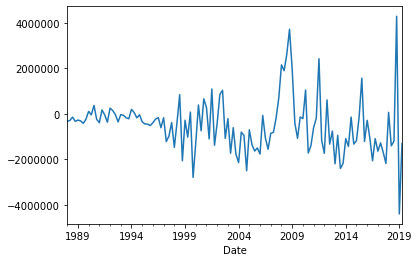

In [187]:
df1[['NW', 'Liab', 'Assets', 'Save']].sum(axis=1).plot()

In [189]:
-df1['Liab'] - df1[['NW', 'Liab', 'Assets', 'Save']].sum(axis=1)

Date
1988-01-01     361909.0
1988-04-01     375007.0
1988-07-01     226112.0
1988-10-01     403930.0
1989-01-01     307553.0
                ...    
2018-04-01    1549260.0
2018-07-01    1384087.0
2018-10-01   -4156614.0
2019-01-01    4411516.0
2019-04-01    1480037.0
Length: 126, dtype: float64

In [176]:
clean_data[['FL152000005.Q', 'FA152000005.Q']]

,FL152000005.Q,FA152000005.Q
Date,,
1988-01-01,21790818.0,876129.0
1988-04-01,22314750.0,917730.0
1988-07-01,22717239.0,871964.0
1988-10-01,23296994.0,833138.0
1989-01-01,23773784.0,558027.0
...,...,...
2018-04-01,123840708.0,1982359.0
2018-07-01,126091674.0,2769996.0
2018-10-01,122312565.0,1952284.0


In [145]:
(clean_data['net worth .1'] - (clean_data['holding gains on assets at market value.1'] - clean_data['total liabilities.1'] + clean_data['net saving less net capital transfers paid including consumer durables and government insurance and pension fund reserves ']))

Date
1988-01-01      29770.0
1988-04-01    -118178.0
1988-07-01    -148627.0
1988-10-01    -113455.0
1989-01-01    -201174.0
                ...    
2018-04-01    -435113.0
2018-07-01   -1107786.0
2018-10-01    -222128.0
2019-01-01    -559896.0
2019-04-01    -553357.0
Length: 126, dtype: float64

In [141]:
clean_data['total liabilities.1']

Date
1988-01-01    262512.0
1988-04-01    293692.0
1988-07-01    293628.0
1988-10-01    258212.0
1989-01-01    232408.0
                ...   
2018-04-01    530041.0
2018-07-01    541704.0
2018-10-01    465435.0
2019-01-01    347957.0
2019-04-01    684574.0
Name: total liabilities.1, Length: 126, dtype: float64

In [132]:
clean_data['Saving'] = clean_data['net saving less net capital transfers paid including consumer durables and government insurance and pension fund reserves ']

### Money Growth

In [1]:
url = 'https://www.federalreserve.gov/datadownload/Output.aspx?rel=H6&series=fafc1295c552e99d2b907eb62278e4ca&lastobs=&from=01/01/1988&to=12/31/2019&filetype=csv&label=include&layout=seriescolumn'

In [3]:
raw_data = pd.read_csv(url)

d = {v: re.sub("\s+[\(\[].*?[\)\]]", "", i) 
     for i, v in raw_data.iloc[4, 1:].iteritems()}

date_column = raw_data.loc[5:, 'Series Description']
date_index = pd.to_datetime(date_column).rename('Date')
columns = raw_data.iloc[4, 1:].values
    
clean_data = raw_data.iloc[5:, 1:].replace('ND', np.nan).astype('float')
clean_data.index = date_index
clean_data.columns = columns

In [62]:
final2 = {}
data = clean_data[['M2_N.WM', 'MMFIN_N.WM']].sum(axis=1)
month_list = clean_data.resample('MS').mean().pct_change(12).dropna().index
for date in month_list:
    month_len = len(data.loc[date.strftime('%Y-%m')])
    prevyr = f'{date.year - 1}-{date.month}'
    weeks_in_short_month = 4
    end_date = date
    if month_len < 4:
        end_date = date
        short_month = date.strftime('%B %Y')
        val = data.loc[date.strftime('%Y-%m')].mean()
        prv = data.loc[prevyr].iloc[:month_len]
        prev = prv.mean()
        weeks_in_short_month = len(prv)
    elif month_len >= 4:
        val = data.loc[date.strftime('%Y-%m')].mean()
        prev = data.loc[prevyr].mean()
        end_full = date
    final2[date] = (val / prev - 1) * 100
    
final = pd.Series(final2, name='value')
final.to_csv(data_dir / 'm2imf.csv', index_label='date', header='True')

In [82]:
week_conv = {1: f'the first week of {short_month}', 
             2: f'the first two weeks of {short_month}', 
             3: f'the first three weeks of {short_month}',
             4: end_full.strftime('%B %Y')}

if final.iloc[-1] >= 0.1:
    txt = f'increased over the equivalent previous year value by {final.iloc[-1]:.1f} percent'
elif final.iloc[-1] <= -0.1:
    txt = f'decreased over the equivalent previous year value by {abs(final.iloc[-1]):.1f} percent'   
else:
    txt = 'was virtually unchanged over the previous year value'
    
if s['days_since_match'] > 300:
    txt2 = f", {s['last_matched'].replace('highest level', 'fastest growth rate')}."
else:
    txt2 = '.'
    
text = (f'In {week_conv[weeks_in_short_month]}, '+
        f'the M2 plus institutional money funds measure {txt}{txt2}')

write_txt(text_dir / 'm2imf.txt', text)

In [99]:
gdp = nipa_df(retrieve_table('T10105')['Data'], ['A191RC'])['A191RC']
m2sh = (clean_data['M2_N.WM'].iloc[-1] / (gdp.iloc[-1] / 1000)) * 100
imfsh = (clean_data['MMFIN_N.WM'].iloc[-1] / (gdp.iloc[-1] / 1000)) * 100

text2 = (f'In the week of {clean_data.index[-1].strftime("%B %d, %Y")}, '+
         f'the M2 measure of money averaged \${clean_data["M2_N.WM"].iloc[-1] / 1000:.1f} '+
         f'trillion, equivalent to {m2sh:.1f} percent of GDP. Institution money market '
         +f'accounts, which are not included in M2, can be combined with M2 to create a '+
         f'slightly-broader-than-M2 measure of the money stock. These funds averaged '+
         f'\${clean_data["MMFIN_N.WM"].iloc[-1] / 1000:.1f} trillion in the same week, '+
         f'equivalent to {imfsh:.1f} percent of GDP. ')

write_txt(text_dir / 'm2imf2.txt', text2)

### FHFA Housing Price Index

In [85]:
url = 'https://www.fhfa.gov/HPI_master.csv'

In [86]:
df = pd.read_csv(url)

In [96]:
data = df.query('frequency == "monthly" and place_name == "United States"')[['yr', 'period', 'index_sa']]

In [100]:
data.index = [pd.to_datetime(f'{i.yr:.0f}-{i.period:.0f}-01') for idx, i in data.iterrows()]

In [106]:
(data['index_sa'].pct_change(12) * 100).to_csv(data_dir / 'hpi.csv', index_label='date', header='True')

### VIX 

In [107]:
prev = pd.read_excel(data_dir/ 'vixarchive.xls', skiprows=1, index_col='Date')

In [108]:
VIX = 'http://www.cboe.com/publish/scheduledtask/mktdata/datahouse/vixcurrent.csv'

In [109]:
curr = pd.read_csv(VIX, skiprows=1, index_col='Date', parse_dates=True)

In [110]:
(prev.append(curr)['VIX Close'].resample('MS').mean()
 .append(curr['VIX Close'].iloc[-1:]).rename('value')
 .to_csv(data_dir / 'vix.csv', index_label='date', header='True'))